<a href="https://colab.research.google.com/github/dariaAlium/iad/blob/master/Lab_2_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в анализ данных" </center>

# <center> Лабораторная работа №2. Кластерный анализ. </center>

## Задание 1

В данном задании вам необходимо реализовать алгоритм кластеризации [Partition Around Medoids](http://algowiki-project.org/ru/%D0%A3%D1%87%D0%B0%D1%81%D1%82%D0%BD%D0%B8%D0%BA:Denemmy/Partitioning_Around_Medoids_%28%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%29).  
  
Два возможных варианта реализации:  
  
### Функция
  
Нужно написать функцию, которая принимает на вход несколько параметров и возвращает также несколько значений.  
  
Параметры функции:
- **data:** данные в виде dataframe или матрицы (аналогично функциям и методам, которые рассматривали на практике);
- **k:** число центров (кластеров);
- **metric:** расстояние между объектами (те же, что поддерживает функция `pdist()`);
- **max_iter:** максимальное число итераций;  
- **tol:** минимальное значение изменения целевой функции.

Возвращаемые значения:  
- **inertia:** итоговое значение целевой функции;
- **medoids:** центры кластеров - индексы объектов данных, которые являются центрами;
- **labels:** метки кластеров для каждого объекта.
  
### Класс  
  
По аналогии с классами в scikit-learn, нужно реализовать класс, наследуемый от [Base Estimator](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html).  
Подробнее про реализацию своих моделей в scikit-learn: [here](https://scikit-learn.org/stable/developers/develop.html#rolling-your-own-estimator).
  
Параметры: 
- **k:** число центров (кластеров);
- **metric:** расстояние между объектами (те же, что поддерживает функция `pdist()`);
- **max_iter:** максимальное число итераций;  
- **tol:** минимальное значение изменения целевой функции.  
  
Методы:  
- **fit():** метод для выполнения кластеризации.  
    Аргументы метода:  
    - **data:** данные в виде dataframe или матрицы
  
Атрибуты:  
- **inertia_:** итоговое значение целевой функции;
- **medoids_:** центры кластеров - индексы объектов данных, которые являются центрами;
- **labels_:** метки кластеров для каждого объекта.  
   
<br>  
**Note 1:** Параметры `max_iter` и `tol` должны иметь дефолтные значения.  
**Note 2:** Функции для вычисления расстояний самим реализовывать не нужно, используйте `pdist()`.  
  
<br>  
Также необходимо написать документацию к функции/методу: описать формат входных данных (параметров) и возвращаемых значений, особенности работы функции и детали реализации алгоритма. В качестве образца можно взять документацию к функциям/методам, которые рассматривали на занятиях.  
  
Наивная реализация алгоритма будет работать довольно медленно - это нормально. Будет плюсом (но не является обязательным), если вы попытаетесь оптимизировать ваш код. Можете указать все ваши решения для оптимизации в документации.   

In [0]:
'''
Вместо ридми
Класс принимает только один параметр - количество кластеров
метрика тут тоже одна - евклидовая
в метотде фит уже возвращаются лайблы

так как в примере использования используются нормированные данные по домам рекомендую запутить 
сначала второе (до 1 задания)
'''

In [0]:
import numpy as np
from sklearn.preprocessing import normalize
import scipy.spatial.distance as dis
from sklearn.decomposition import PCA

In [0]:
class PAM():

  def __init__(self, k=3):
    self.k = k
  
  def _init_random_medoids(self, X): #просто создает рандомные медоиды
    #print(2)
    n_samples, n_features = np.shape(X) 
    medoids = np.zeros((self.k, n_features))
    #print(3)
    for i in range(self.k):
      #print(np.random.choice(range(n_samples)))
      medoid = X[np.random.choice(range(n_samples))]
      #print(medoid)
      medoids[i] = medoid
    #print(medoids)
    return medoids

  def _closest_medoid(self, sample, medoids): #ищет ближайшую медоиду к набору
    closest_i = None
    closest_distance = float("inf")
    for i, medoid in enumerate(medoids):
      distance = dis.euclidean(sample, medoid)
      if distance < closest_distance:
        closest_i = i
        closest_distance = distance
    return closest_i

  def _create_clusters(self, X, medoids): #присваивает сэмплы к ближайшим медоидам
    clusters = [[] for x in range(self.k)] 
    for sample_i, sample in enumerate(X):
      medoid_i = self._closest_medoid(sample, medoids)
      clusters[medoid_i].append(sample_i)
    return clusters

  def _calculate_dist(self, X, clusters, medoids): #считает растояние м/у сэплами и медоидами
    dist = 0
    # для каждого кластера
    for i, cluster in enumerate(clusters):
      medoid = medoids[i]
      for sample_i in cluster:
        dist += dis.euclidean(X[sample_i], medoid)
    return dist

  def _get_non_medoids(self, X, medoids): #все сэмплы к-е не медоиды
    non_medoids = []
    for sample in X:
      if not sample in medoids:
        non_medoids.append(sample)
    return non_medoids

  def _get_cluster_labels(self, clusters, X): 
      y_pred = np.zeros(np.shape(X)[0])
      for cluster_i in range(len(clusters)):
        cluster = clusters[cluster_i]
        for sample_i in cluster:
          y_pred[sample_i] = cluster_i
      return y_pred

  def fit(self, X): #ну это понятно для чего)
    X = [list(x) for x in X.to_numpy()] # костыль
   # print(X)
    #рандомно инициируем медоиды
    medoids = self._init_random_medoids(X)
    # присваиваю сэмплы ближайшим медоидам
    clusters = self._create_clusters(X, medoids)
    # расчитываю начальное состояние между медоидами и сэмплами
    dist = self._calculate_dist(X, clusters, medoids)
    # ходим по циклу пока у нас больше не будет более маленького расстояния
    while True:
      best_medoids = medoids
      lowest_dist = dist
      for medoid in medoids:
        # смотрим на не медоидные сэмплы
        non_medoids = self._get_non_medoids(X, medoids)
        # считаем растояния когда меняем медоиды в сэмплах
        for sample in non_medoids:
          # меняем медоиды с сэмплами
          new_medoids = medoids.copy()
          new_medoids[medoids == medoid] = sample
          # создаем новые кластеры с новыми медоидами
          new_clusters = self._create_clusters(X, new_medoids)
          # считаем растояния с новыми медоидами
          new_dist = self._calculate_dist( X, new_clusters, new_medoids)
          # если обмен дает нам меньшее растояние мы все сохраняем
          if new_dist < lowest_dist:
            lowest_dist = new_dist
            best_medoids = new_medoids
      # Если произошел обмен, который 
      #привел к снижению растояния, мы сохраняем полученные медоиды 
      if lowest_dist < dist:
        dist = lowest_dist
        medoids = best_medoids 
      # а если нет, завершаем
      else:
        break

    final_clusters = self._create_clusters(X, medoids)
    # возвращаем распределение по классам
    return self._get_cluster_labels(final_clusters, X)

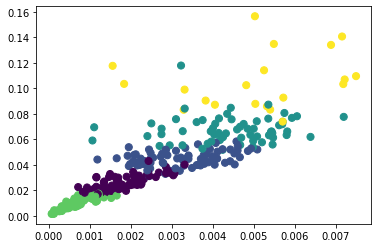

In [0]:
data_pam = data_nec.copy() # shallow copy

Z = PAM(k=5)

data_pam['cluster'] = Z.fit(data_nec)
plt.scatter(data_nec.to_numpy()[:, 0], data_nec.to_numpy()[:, 1], 
            c = [int(x) for x in data_pam['cluster'].to_numpy()], 
            s = 50, cmap = 'viridis')


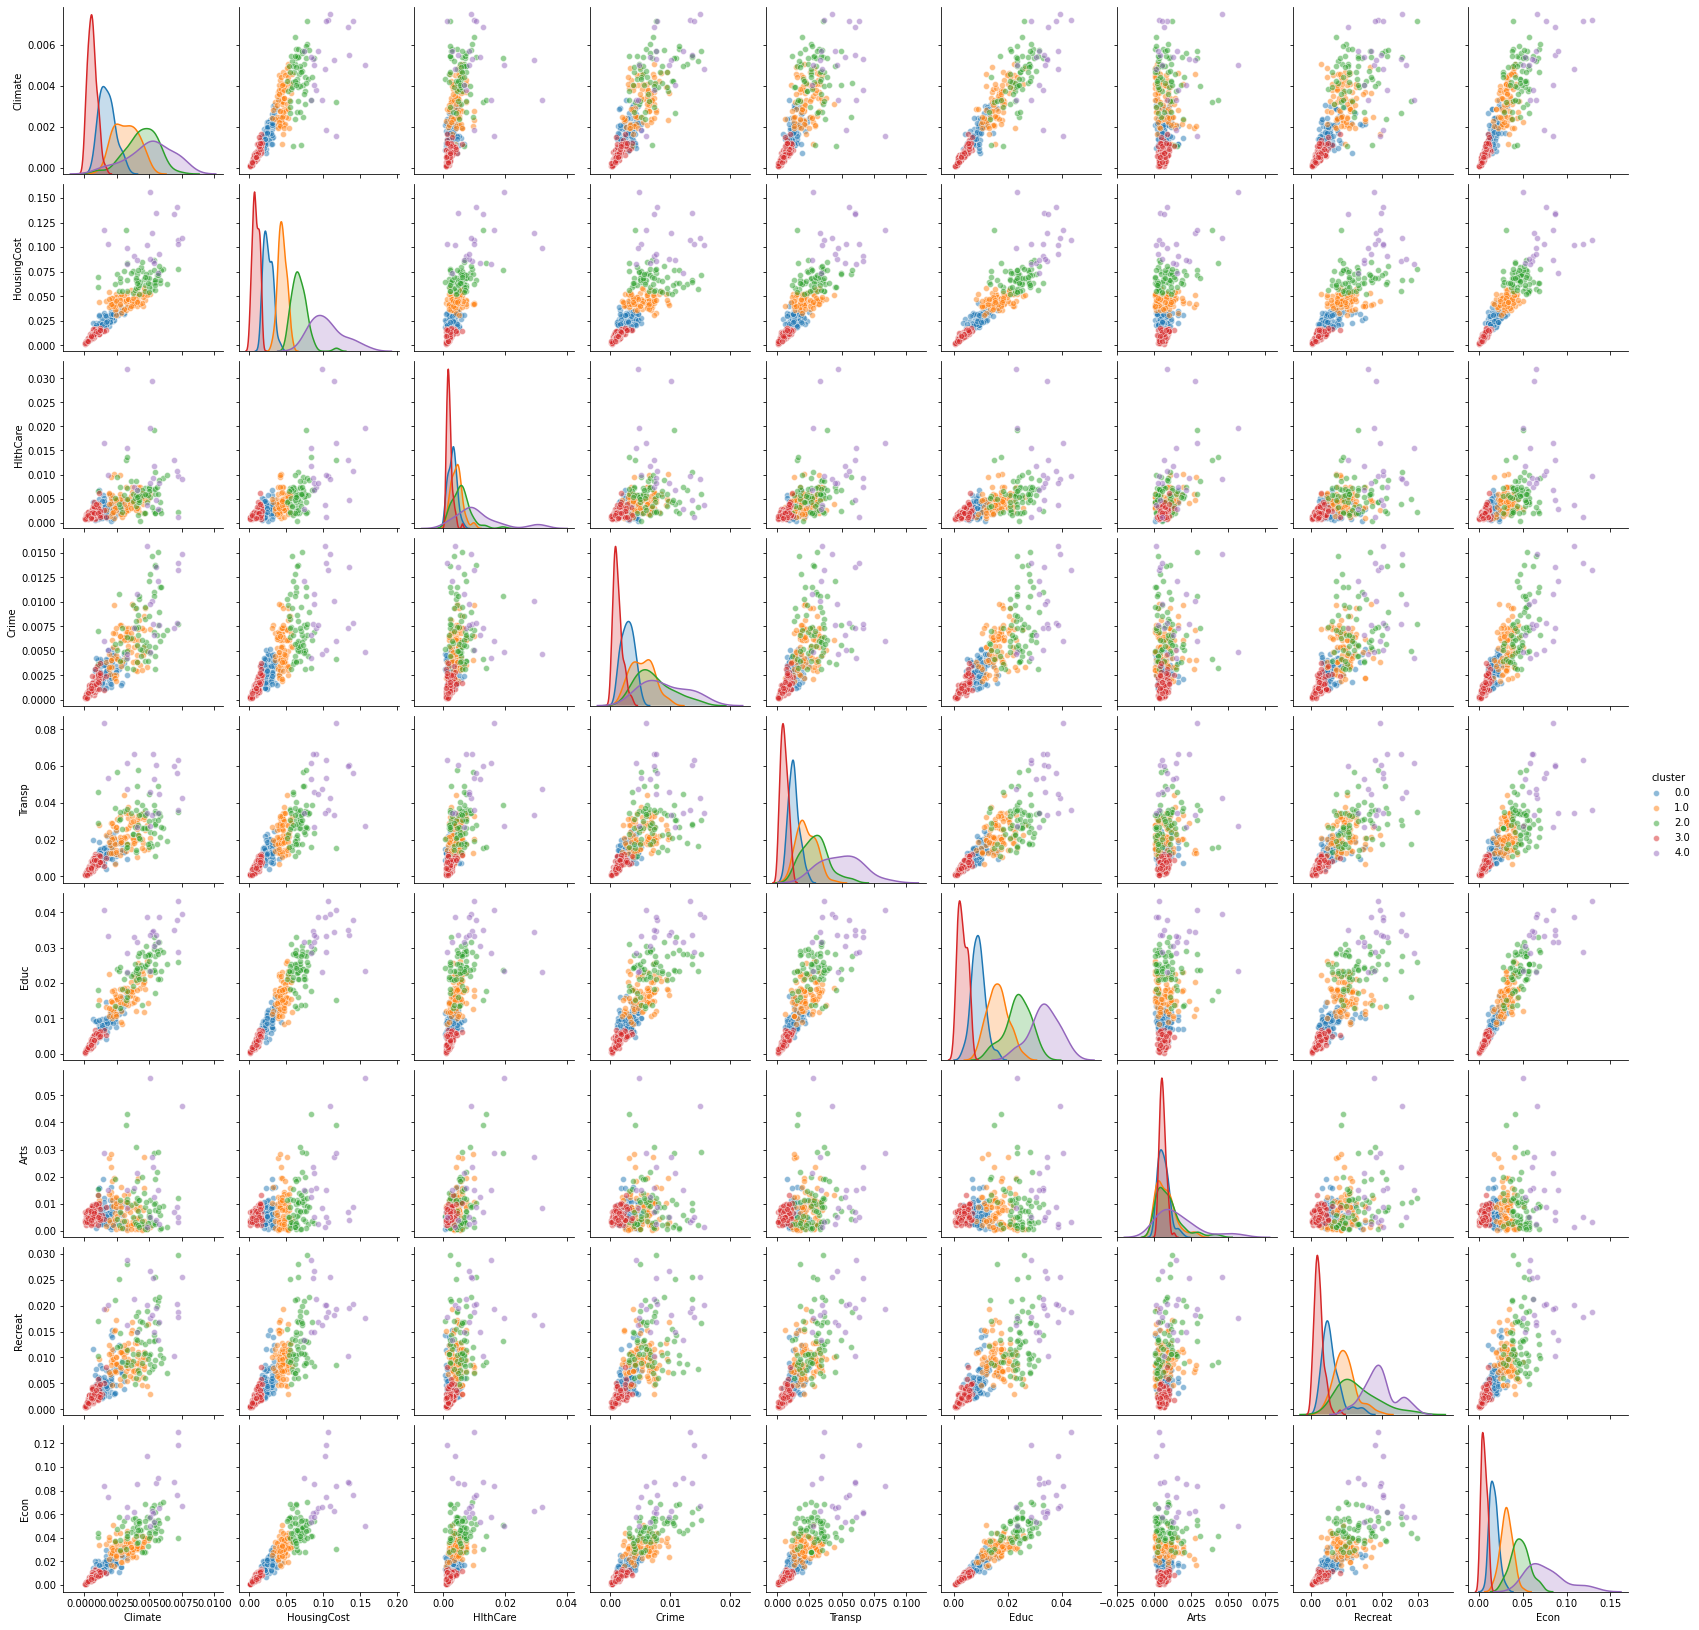

In [0]:
sns.pairplot(data_pam.sort_values('cluster'), 
             hue='cluster', 
             plot_kws={'alpha':0.5}, 
             vars=data_nec.columns
            )
plt.show()


# Задание 2

В рамках данной лабораторной работы вам предлагается проанализировать набор данных по различным городам США. Каждый город характеризуется следующими признаками:

In [0]:
#!pip install hdbscan

import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, is_valid_linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
import scipy
from sklearn.neighbors import NearestNeighbors
import hdbscan
from sklearn import metrics


In [0]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_colwidth', None)

In [0]:
data_desc = pd.read_csv('Data_Description.txt', sep=':')

,Attribute,Description
0,Place,"City, state (postal code)"
1,Climate & Terrain,"Very hot and very cold months, seasonal temperature variation, heating- and cooling-degree days, freezing days, zero-degree days, ninety-degree days."
2,Housing,"Utility bills, property taxes, mortgage payments."
3,Health Care & Environment,"Per capita physicians, teaching hospitals, medical schools, cardiac rehabilitation centers, comprehensive cancer treatment centers, hospices, insurance/hospitalization costs index, flouridation of drinking water, air pollution."
4,Crime,"Violent crime rate, property crime rate."
5,Transportation,"Daily commute, public transportation, Interstate highways, air service, passenger rail service."
6,Education,"Pupil/teacher ratio in the public K-12 system, effort index in K-12, accademic options in higher education."
7,The Arts,"Museums, fine arts and public radio stations, public television stations, universities offering a degree or degrees in the arts, symphony orchestras, theatres, opera companies, dance companies, public libraries."
8,Recreation,"Good restaurants, public golf courses, certified lanes for tenpin bowling, movie theatres, zoos, aquariums, family theme parks, sanctioned automobile race tracks, pari-mutuel betting attractions, major- and minor- league professional sports teams, NCAA Division I football and basketball teams, miles of ocean or Great Lakes coastline, inland water, national forests, national parks, or national wildlife refuges, Consolidated Metropolitan Statistical Area access."
9,Economics,"Average household income adjusted for taxes and living costs, income growth, job growth."


### Notes:   
* Для всех признаков, кроме трех, чем выше значение - тем лучше. Для признаков `Housing` и `Crime` - наоборот.
* Признак `Population`- статистический признак, не имеющий интерпретации как “лучше-хуже”.
* Признак `Place` - уникальный идентификатор объекта (города), он не должен использоваться при кластеризации.
* Также в данных присутствуют географические координаты городов - `Longitude` и `Latitude`. Их также не следует использовать при кластеризации данных.

In [0]:
data = pd.read_csv('Data.txt', sep=' ')

<br>  
### Задания: 

&nbsp;&nbsp;&nbsp;0. Выполните необходимую предобработку данных. Перед кластеризацией исключите из данных признаки `Place`, `Long` и `Lat`.

1. Выполните кластеризацию иерархическим методом.  
Рассмотрите различные расстояния между объектами. Определите, какие следует использовать при кластеризации.  
Выполните кластеризацию с различными расстояниями между кластерами. Сравните результаты, сделайте выводы.  
<br>  
2. Выполните кластеризацию методом dbscan. Используйте расстояния между объектами, определенные в предыдущем пункте.  
Реализуйте эвристику (см. лекции) для выбора параметров алгоритма. Подберите подходящие параметры алгоритма.  
<br>  
3. Выполните кластеризацию методом kmeans. Определите наилучшее (на ваш взгляд) число кластеров.  
<br>  
4. Выполните кластеризацию методом PAM. Используйте расстояния между объектами, определенные в пункте (1). Определите наилучшее (на ваш взгляд) число кластеров.  
Используйте реализацию алгоритма из Задания 1.  
<br>  
5. (Бонусное) Выполните кластеризацию другими методами. Например, [HDBSCAN](https://hdbscan.readthedocs.io/en/latest/) или алгоритмы, [реализованные](https://scikit-learn.org/stable/modules/clustering.html) в scikit-learn.  
<br>  
6. В результате выполнения предыдущих пунктов вы должны получить 4 или больше разбиения объектов (по одному на каждый метод). Сравните их между собой, сделайте выводы о сходствах и различиях.  
Оцените результаты каждой кластеризации, используя метрики, рассмотренные на занятиях (Silhouette и прочие).  
<br>  
7. Выберите одно разбиение, наиболее подходящее на ваш взгляд. Предложите интерпретацию полученным кластерам или покажите, что этого сделать нельзя.  
<br>  
8. Оцените, как полученные кластеры распределены географически. (Бонусное) [Провизуализируйте](https://python-visualization.github.io/folium/quickstart.html) распределение на карте США.  
Оцените, как полученные кластеры распределены по штатам. Можно ли выделить какую-то зависимость (территориальную или для штатов)?

In [26]:
#0 task
data_nec = data.copy()
data_nec.drop(['Place', 'Long', 'Lat'], axis=1, inplace=True) # axis=0 will do for rows
data_nec = pd.DataFrame(preprocessing.normalize(data_nec), columns=list(data_nec.columns))

data_nec


,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ,Pop
0,0.004673,0.055609,0.002126,0.008279,0.036155,0.024728,0.008933,0.012602,0.068462,0.994972
1,0.000871,0.012322,0.002507,0.001342,0.007393,0.003691,0.008425,0.003985,0.006586,0.999820
2,0.004148,0.065044,0.005477,0.008597,0.022432,0.022689,0.002100,0.007613,0.046530,0.996194
3,0.000569,0.009459,0.001712,0.000730,0.008233,0.004066,0.005568,0.001934,0.007014,0.999869
4,0.001569,0.019987,0.004413,0.003532,0.015617,0.007206,0.010707,0.006220,0.013638,0.999465
...,...,...,...,...,...,...,...,...,...,...
324,0.001394,0.021621,0.004478,0.001687,0.009038,0.008184,0.004426,0.002258,0.012504,0.999589
325,0.003096,0.037273,0.001835,0.006401,0.021594,0.014417,0.005765,0.012386,0.028858,0.998430
326,0.001416,0.021948,0.001869,0.001154,0.005944,0.007611,0.002680,0.002208,0.012968,0.999619
327,0.001073,0.013211,0.002064,0.001765,0.006349,0.005494,0.005263,0.002497,0.007327,0.999829


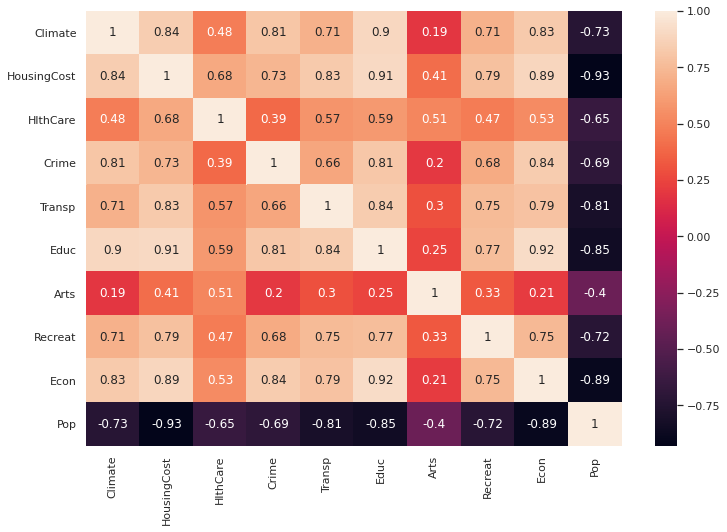

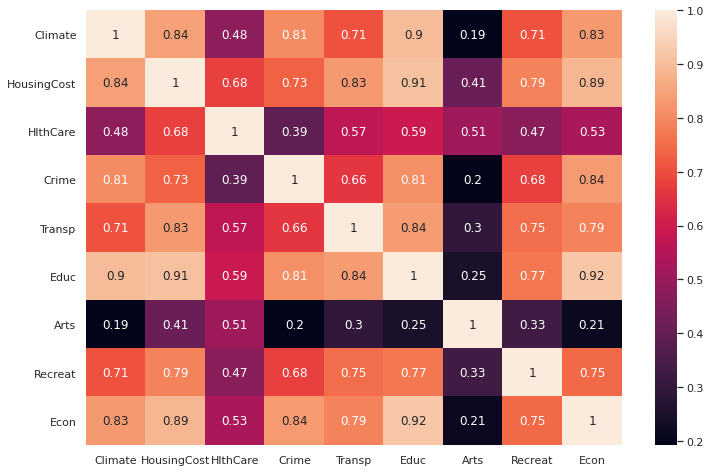

'\nтак то лучше\n'

In [27]:
#describe
'''
посмотрим как данные коррелируют друг с другом
'''
D_corr =data_nec.corr().loc[data_nec.columns,
                      data_nec.columns
                     ]
plt.figure(figsize=(12, 8))
sns.heatmap(D_corr, annot=True)
plt.show()
'''
как видно по матрице корреляции столбец с популяцией стоит тоже удалить 
так как он слишком сильно влияет на остальные (и по сравнению с другими даже
после нормализации слишком большой)
'''
data_nec.drop(['Pop'], axis=1, inplace=True)
D_corr =data_nec.corr().loc[data_nec.columns,
                      data_nec.columns
                     ]
plt.figure(figsize=(12, 8))
sns.heatmap(D_corr, annot=True)
plt.show()
'''
так то лучше
'''

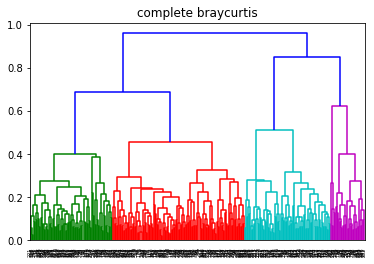

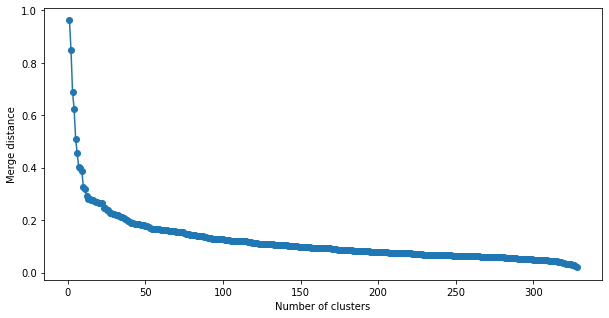

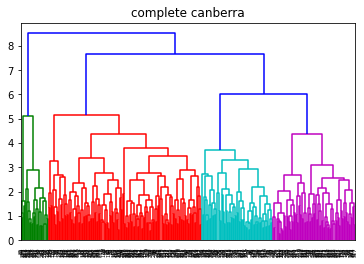

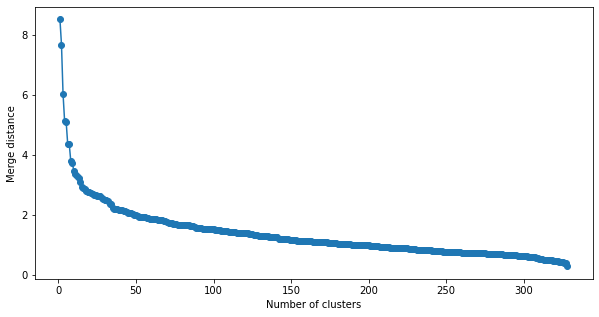

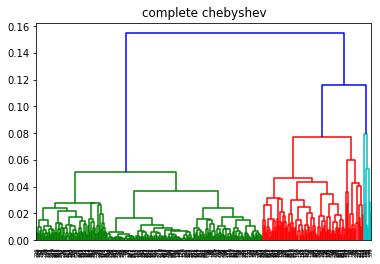

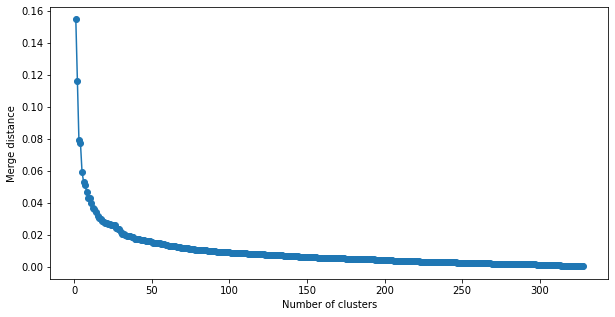

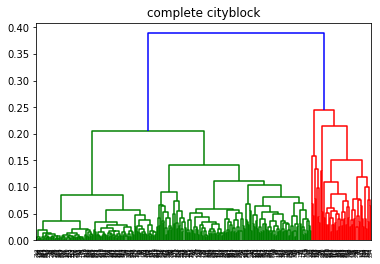

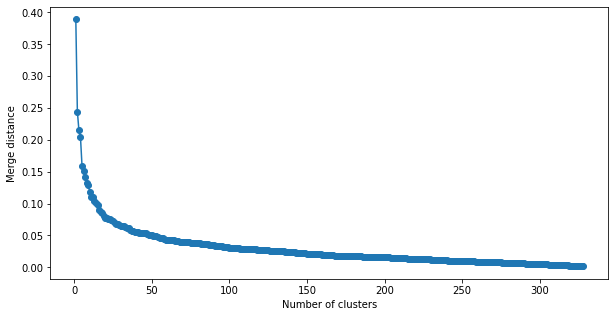

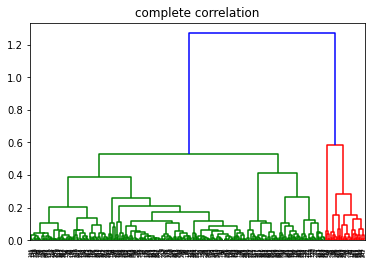

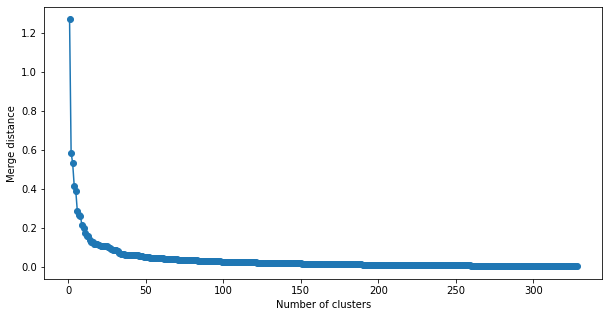

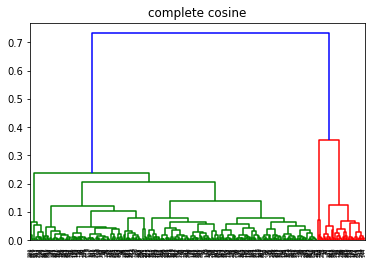

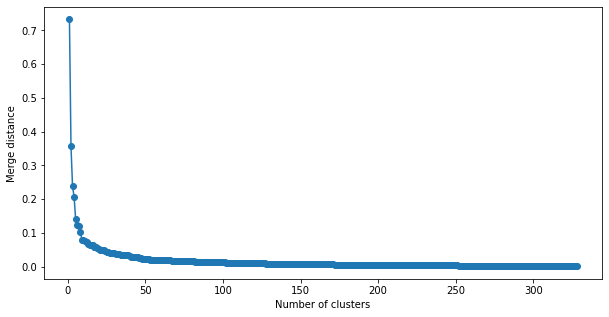

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


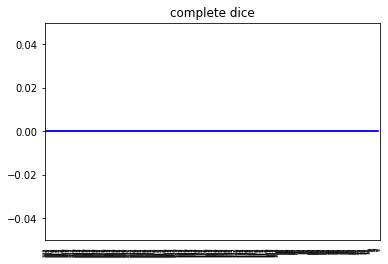

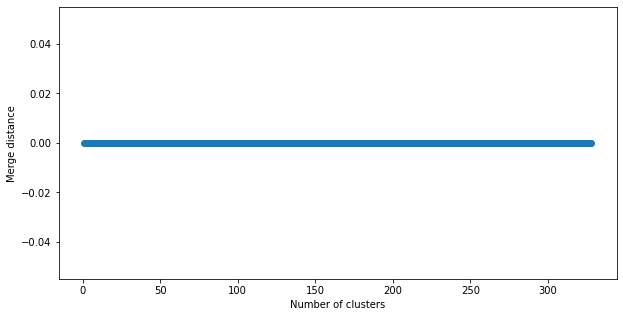

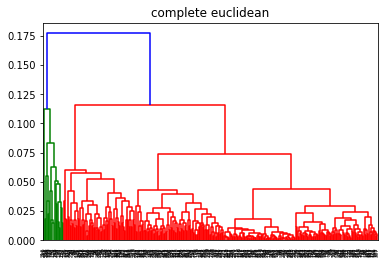

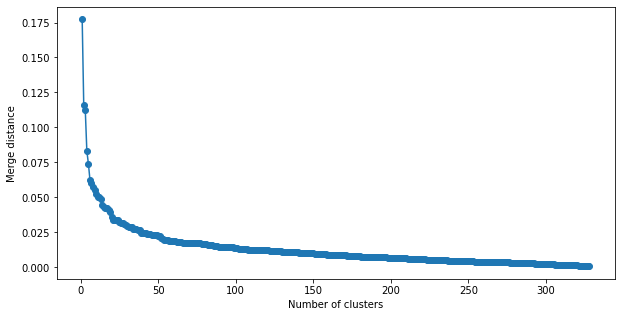

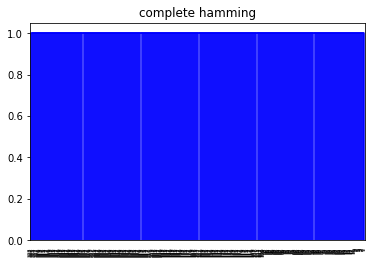

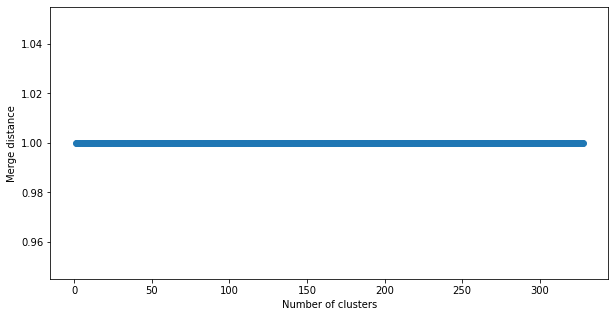

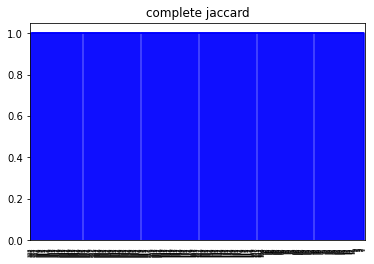

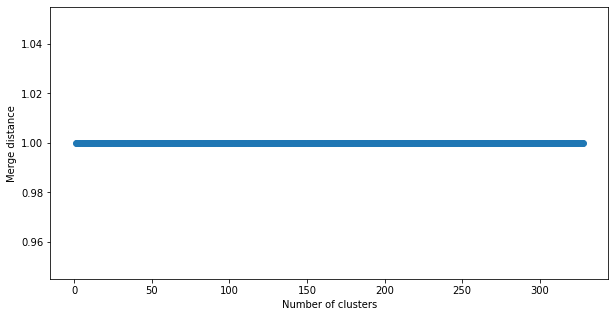

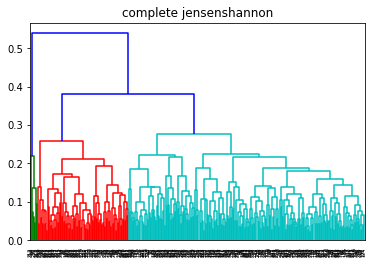

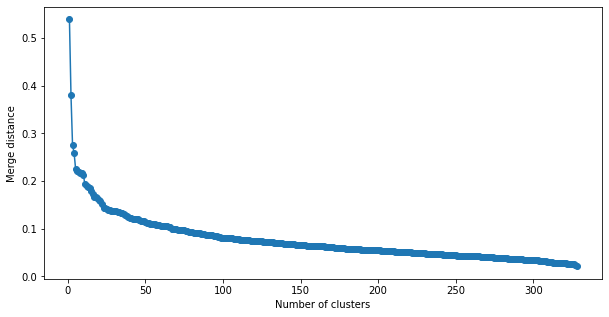

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


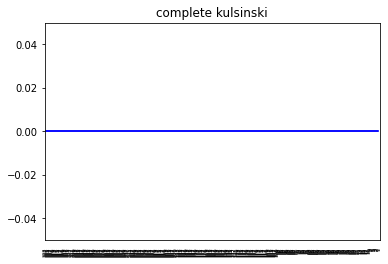

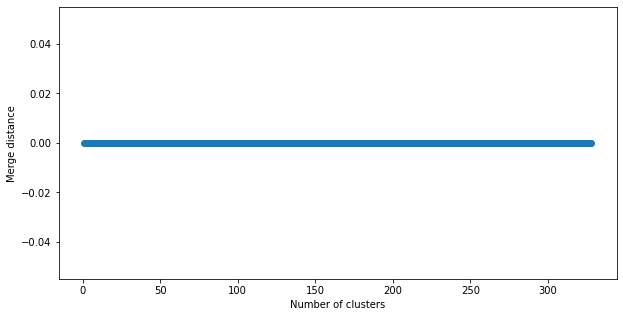

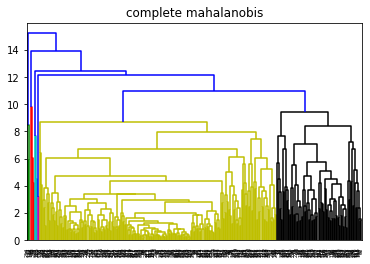

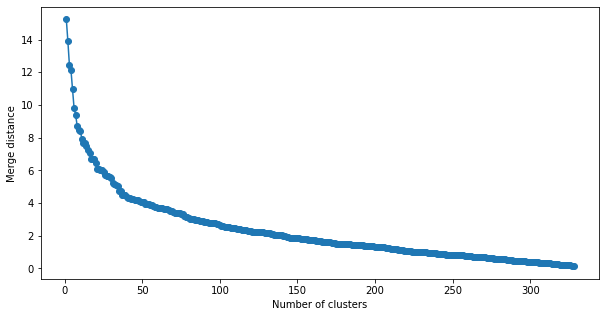

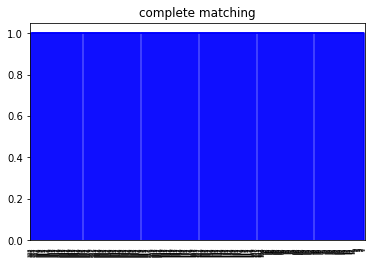

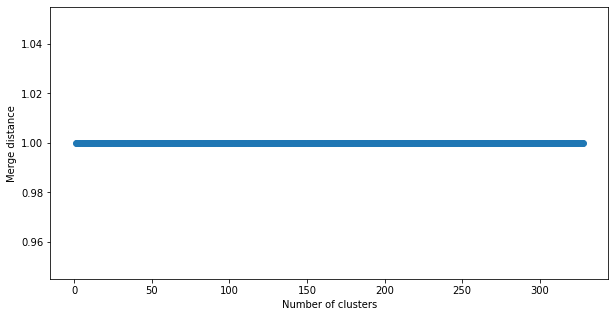

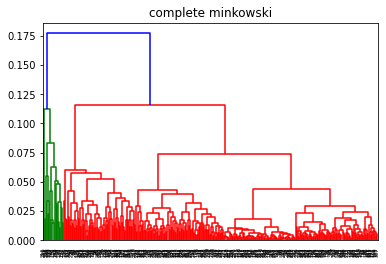

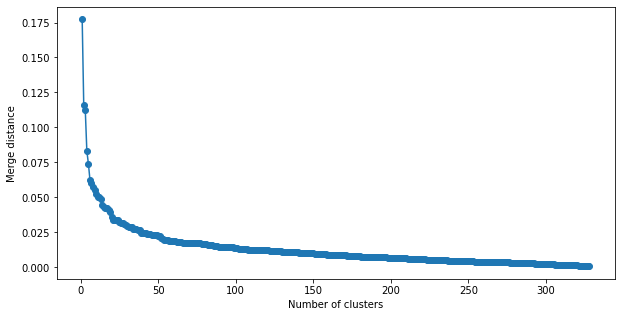

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


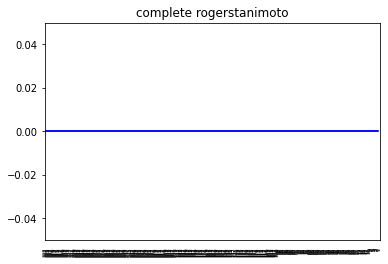

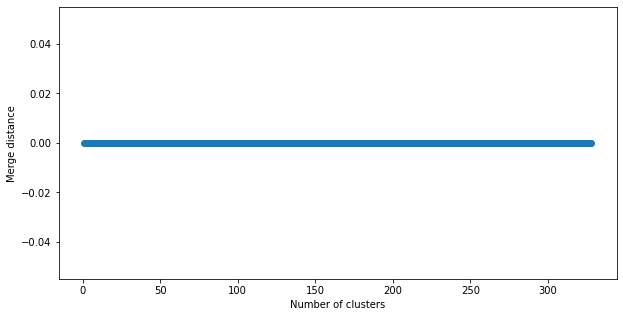

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


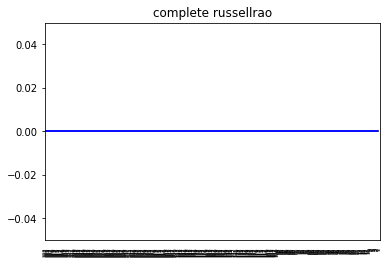

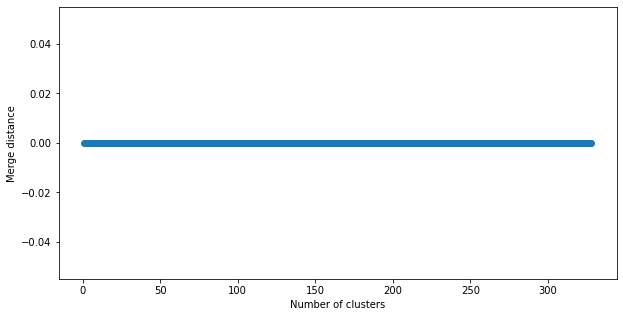

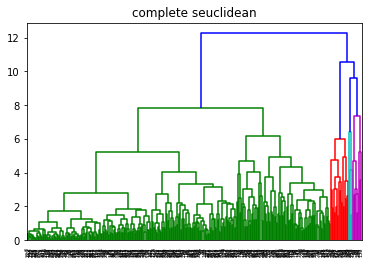

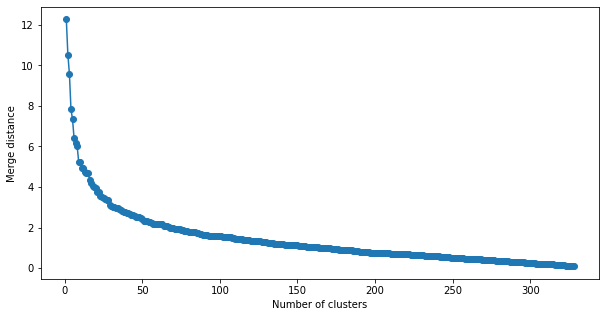

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


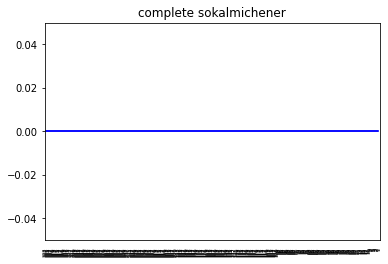

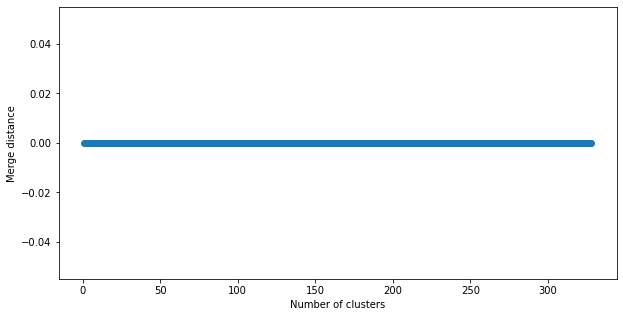

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


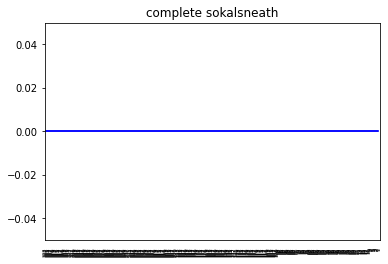

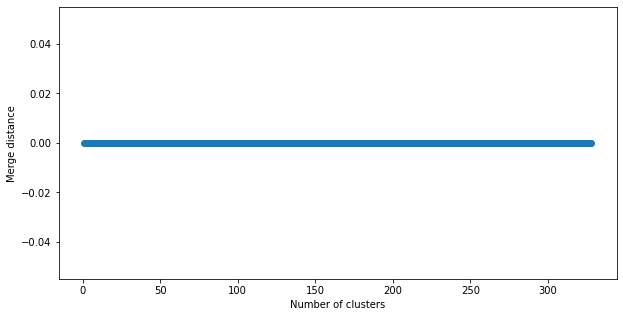

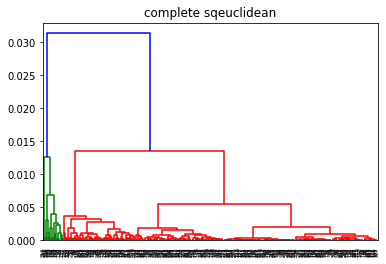

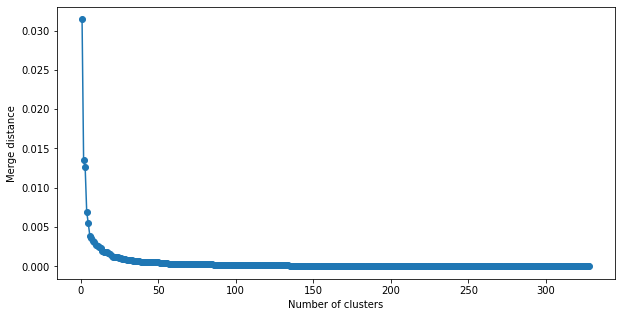

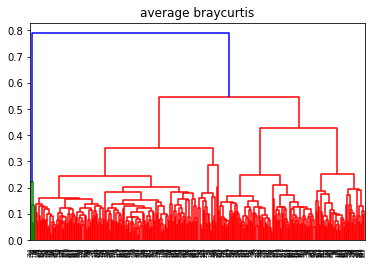

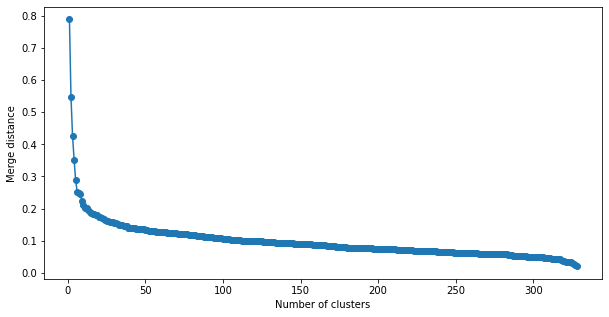

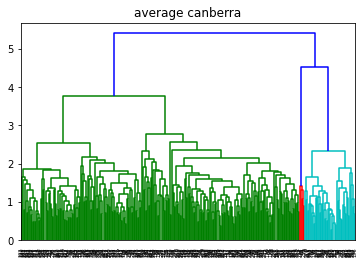

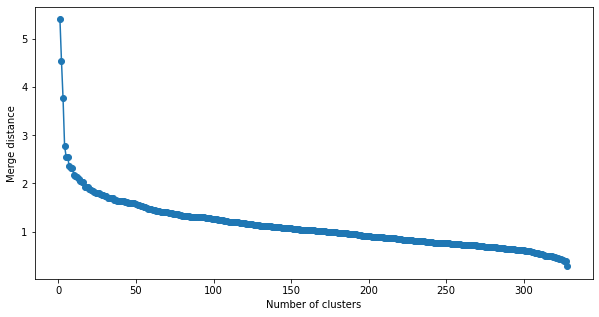

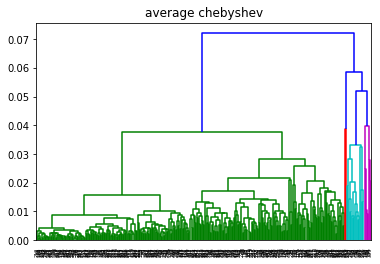

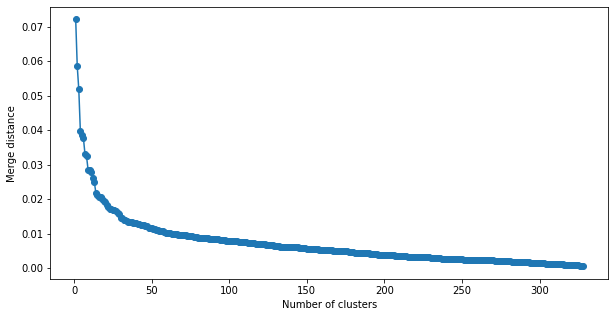

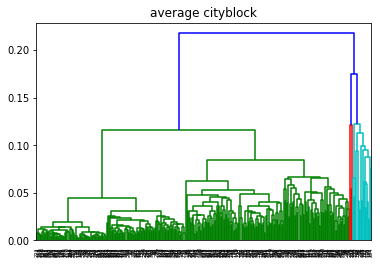

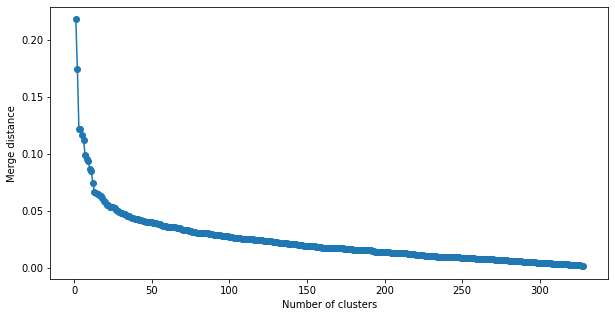

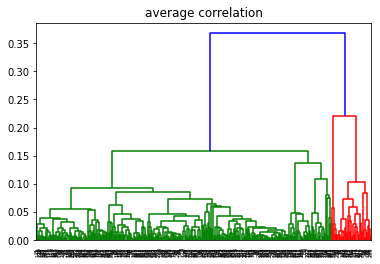

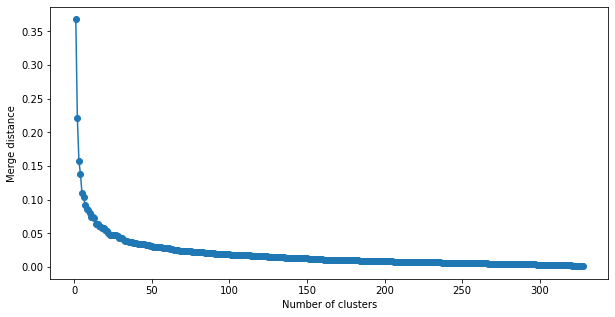

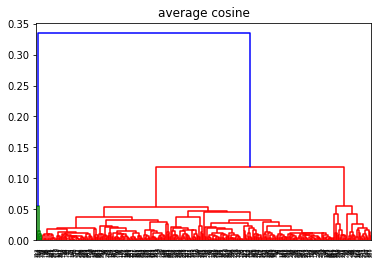

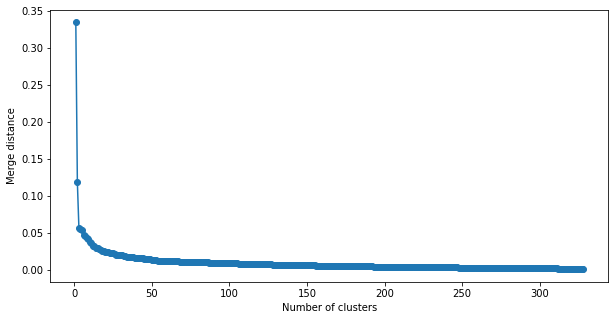

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


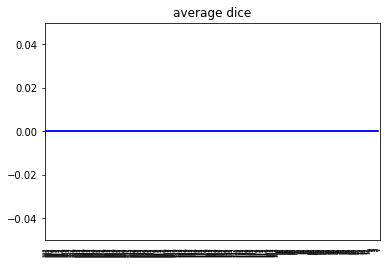

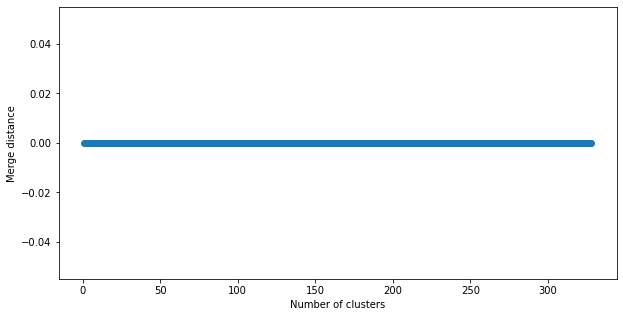

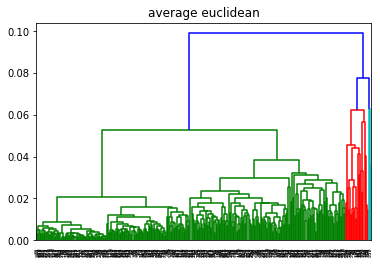

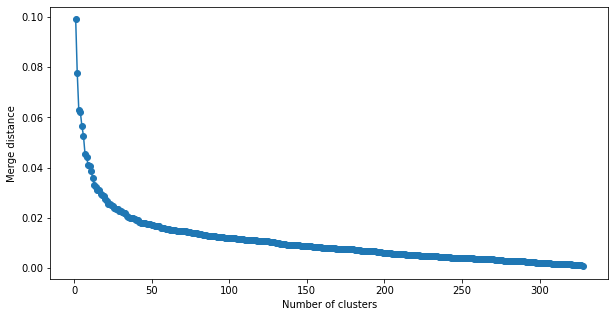

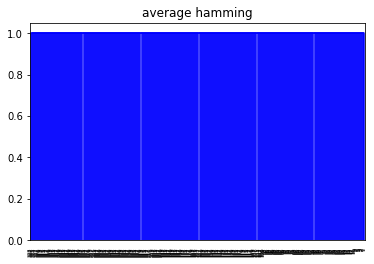

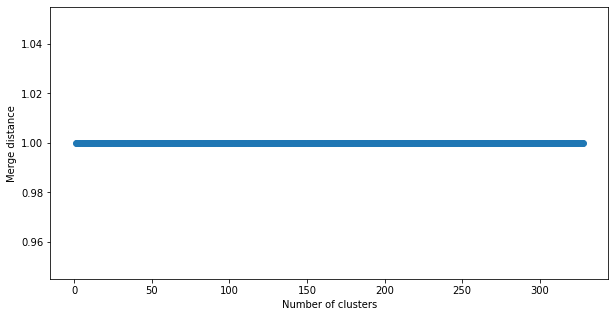

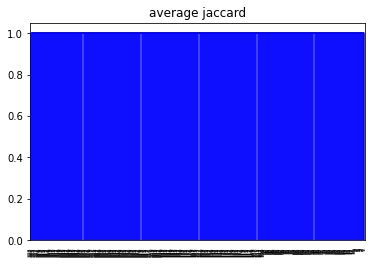

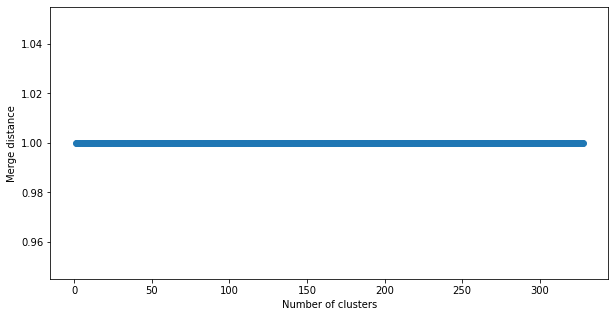

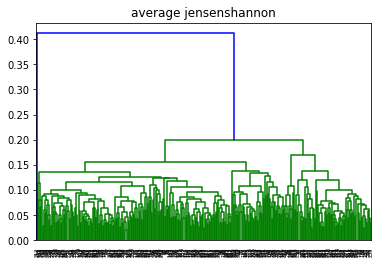

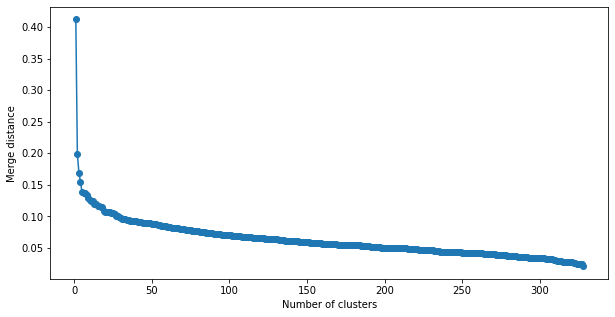

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


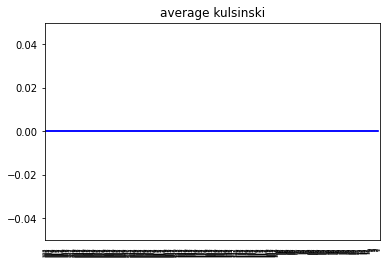

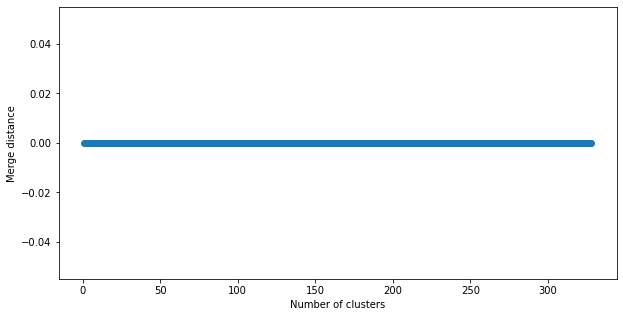

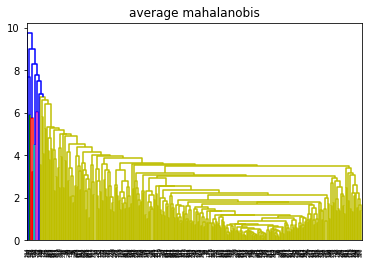

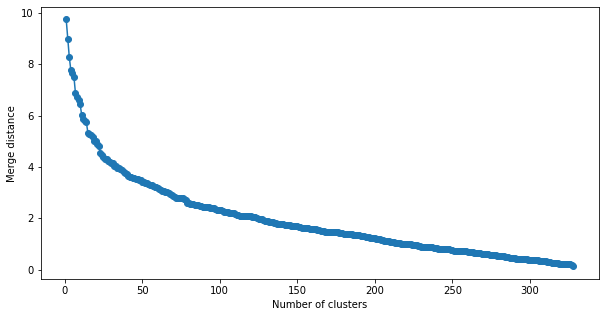

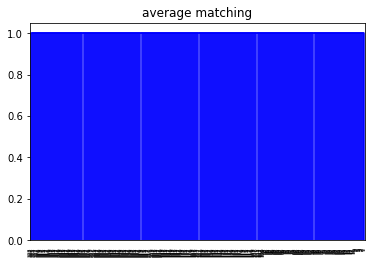

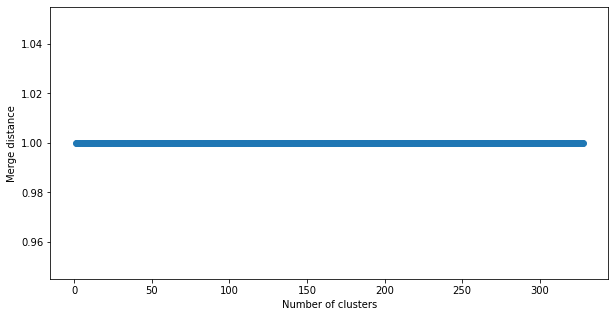

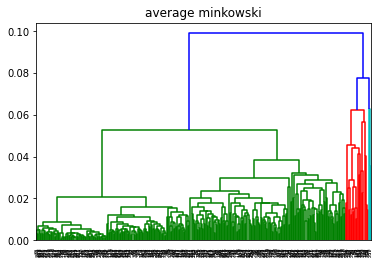

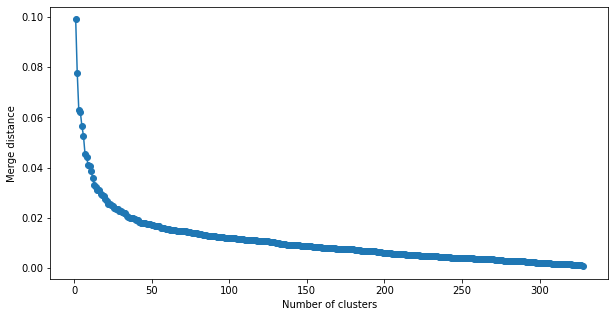

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


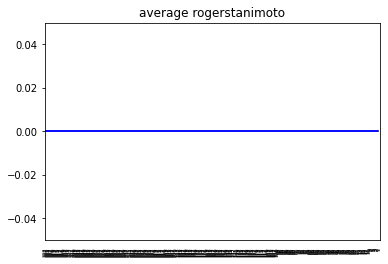

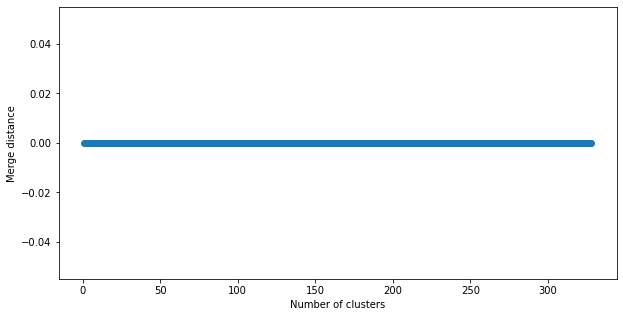

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


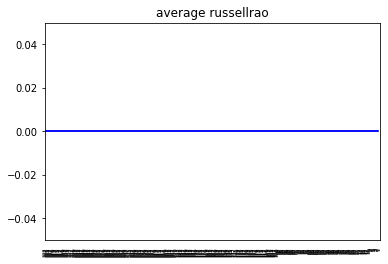

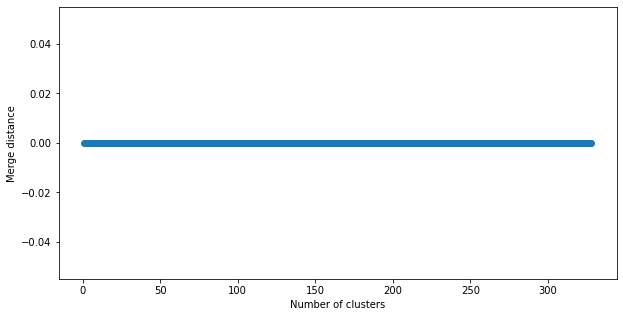

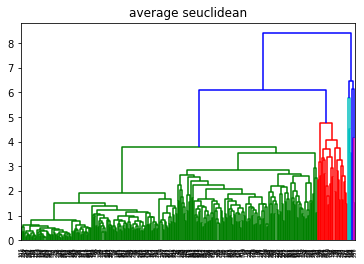

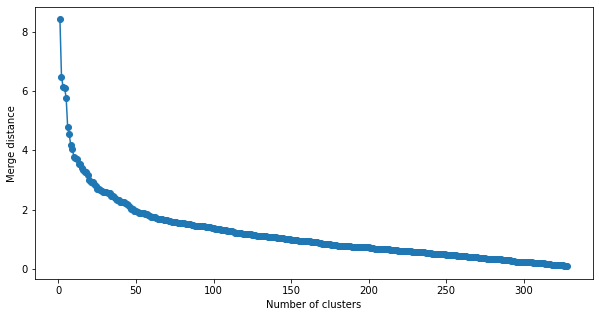

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


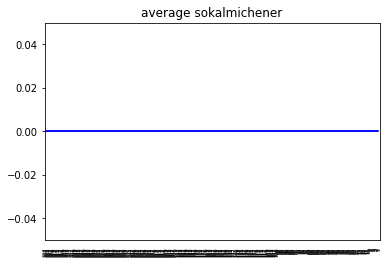

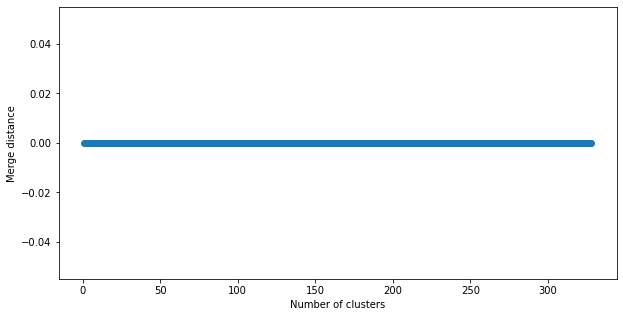

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


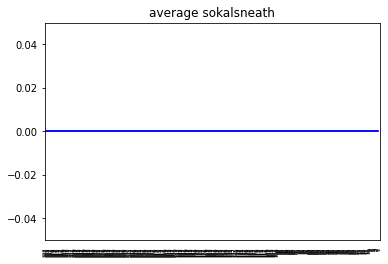

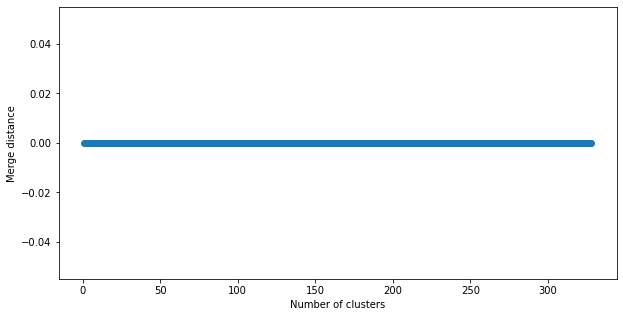

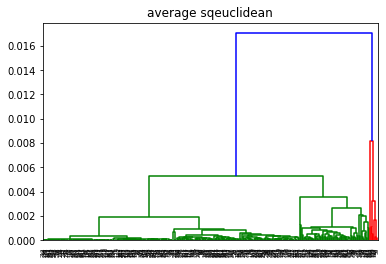

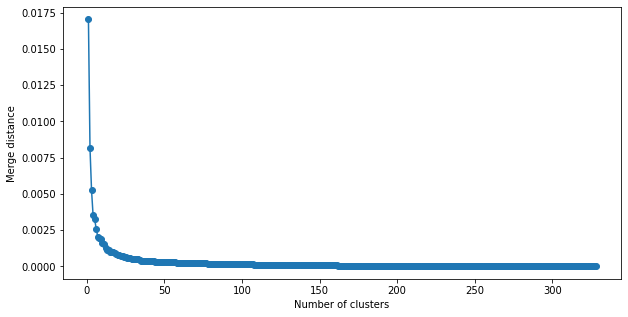

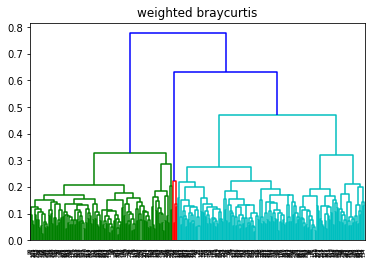

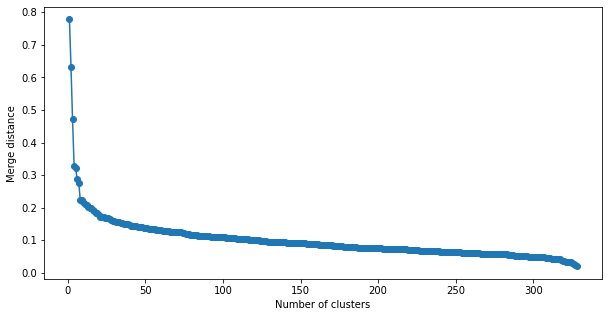

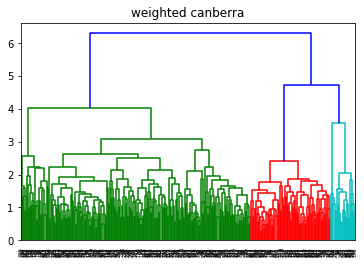

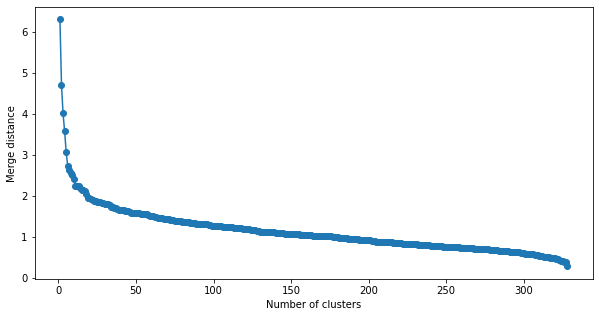

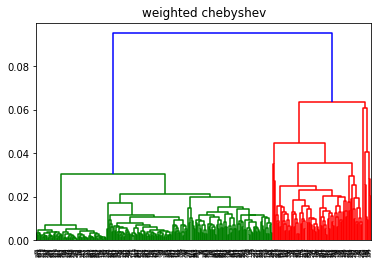

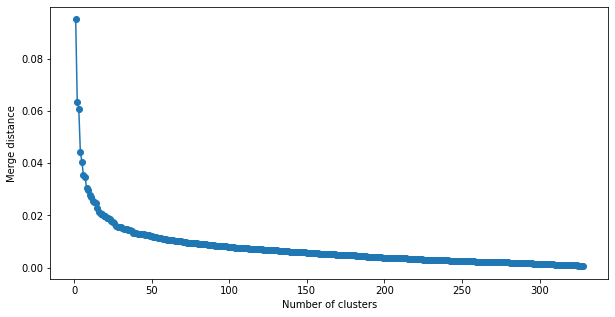

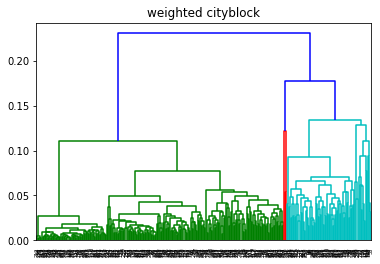

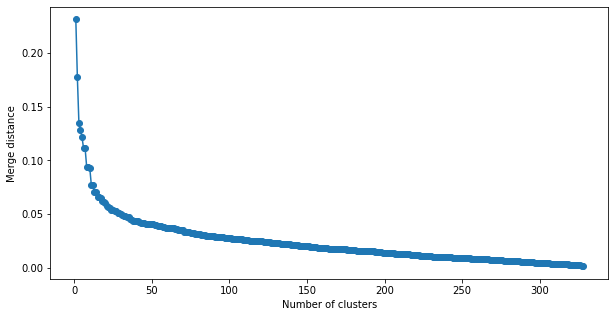

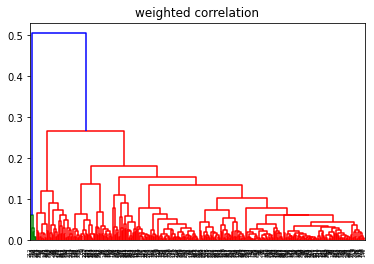

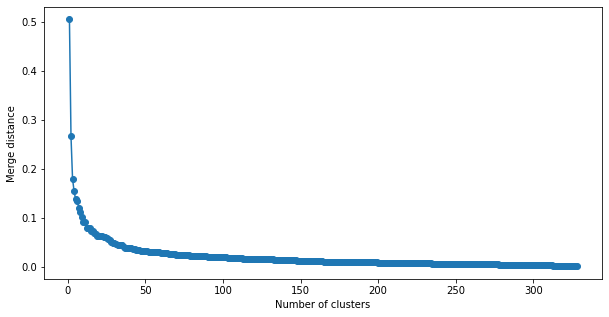

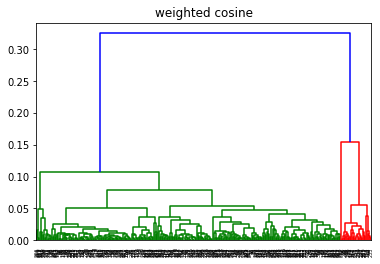

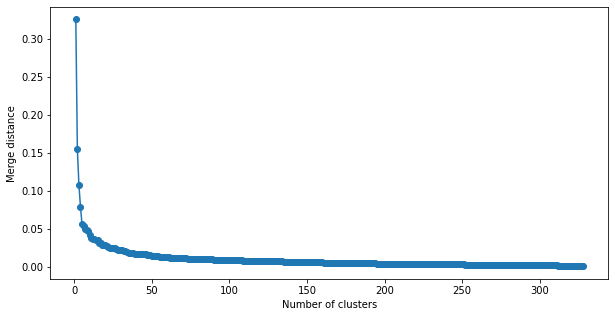

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


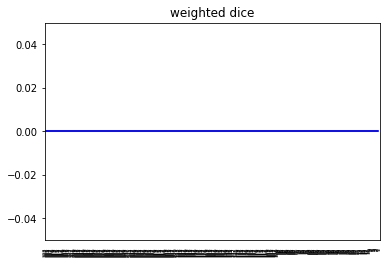

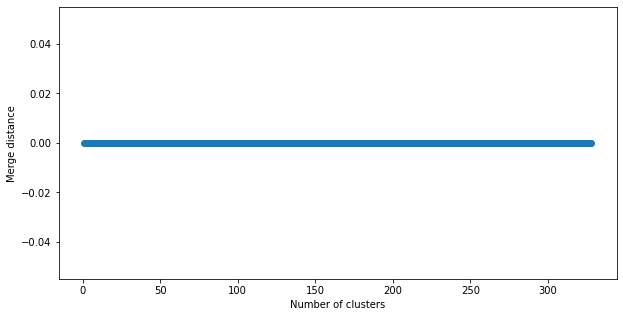

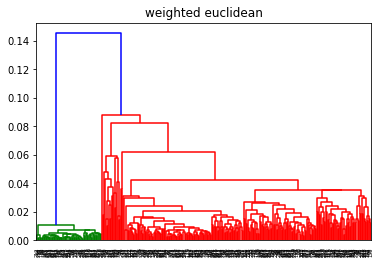

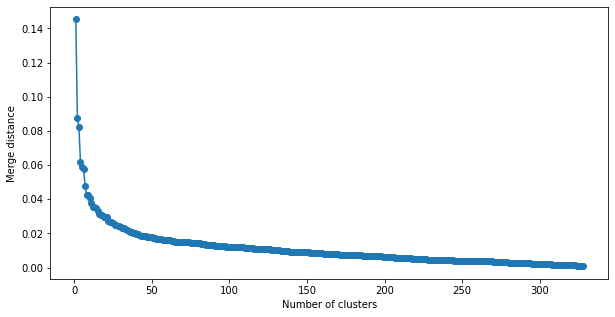

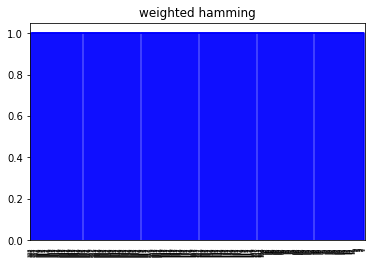

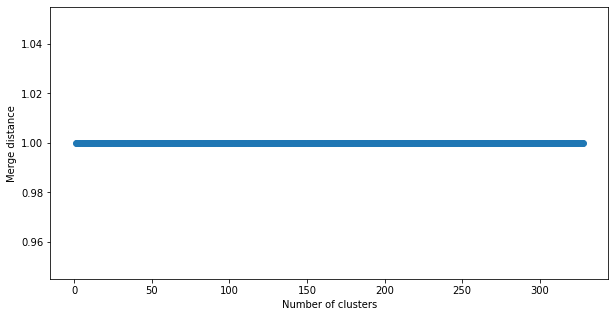

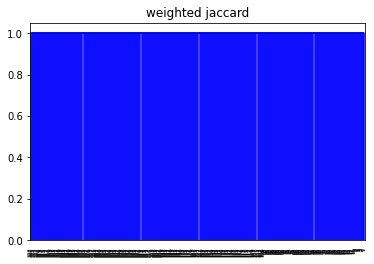

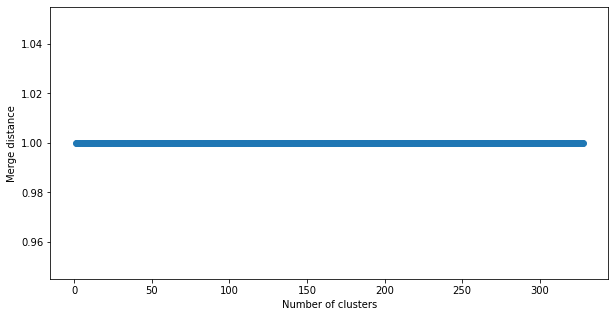

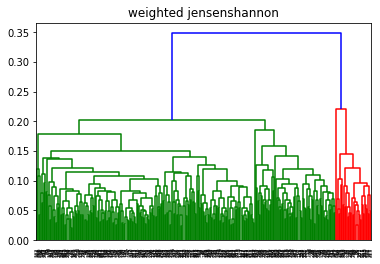

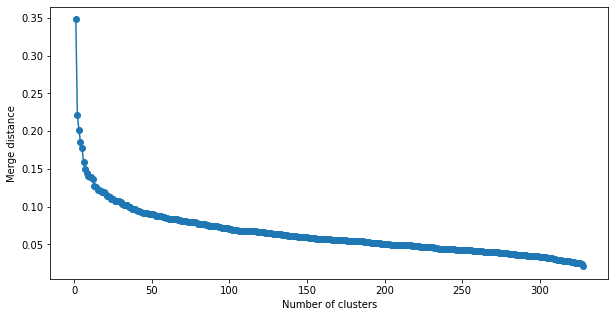

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


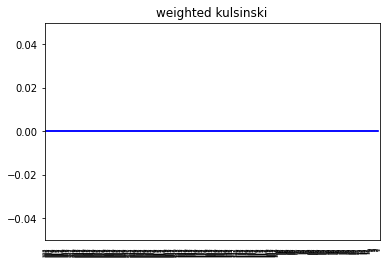

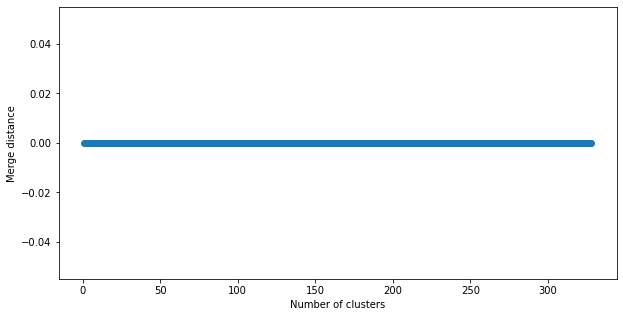

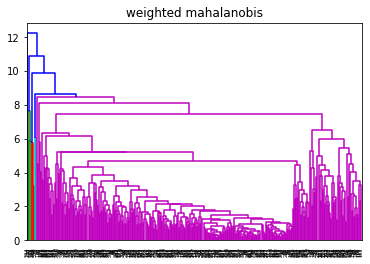

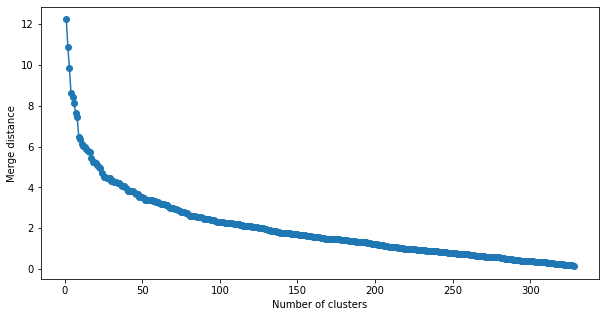

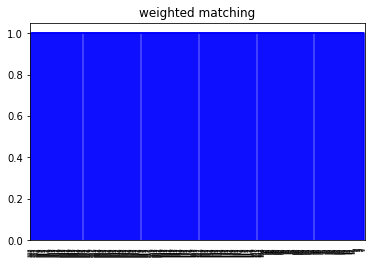

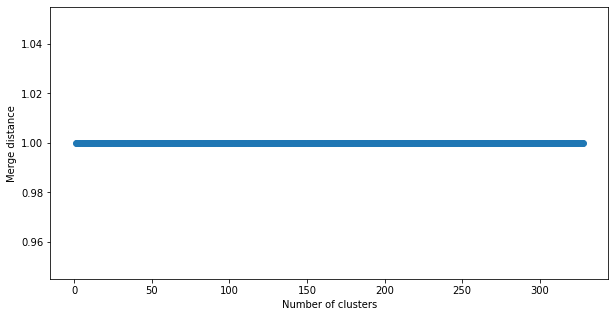

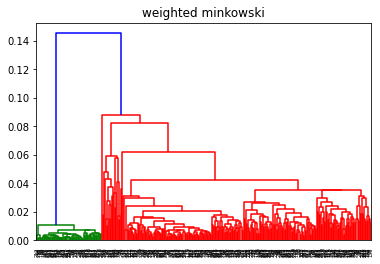

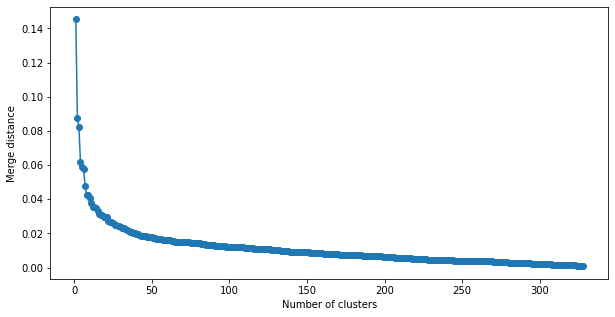

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


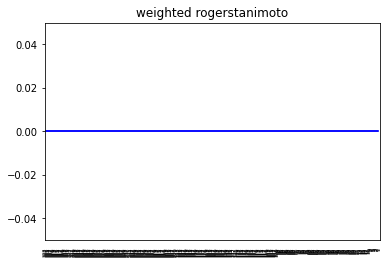

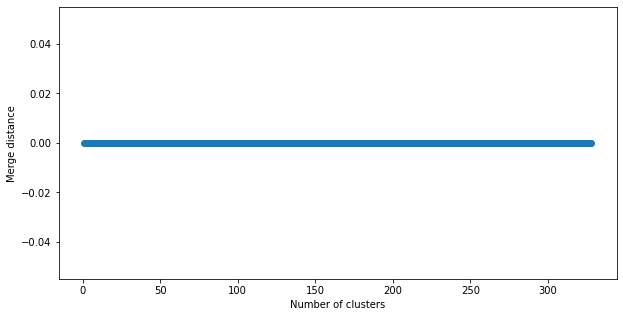

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


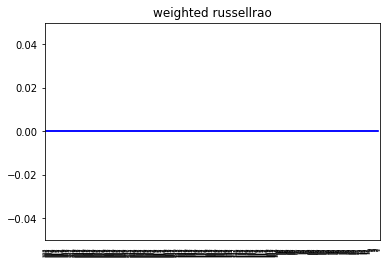

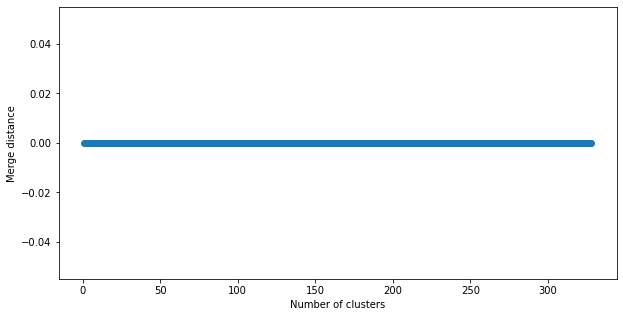

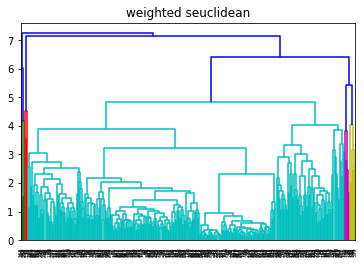

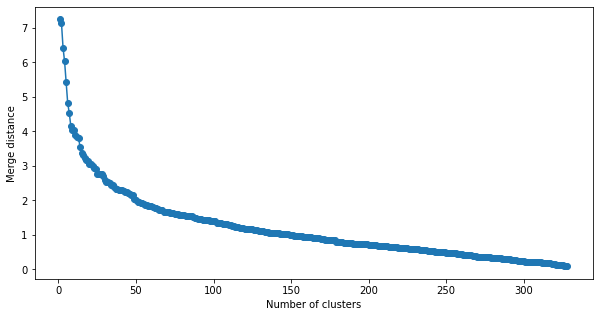

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


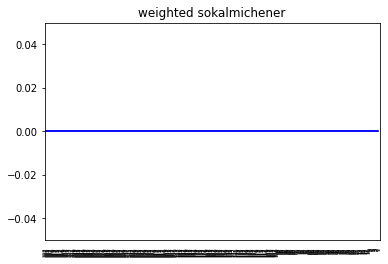

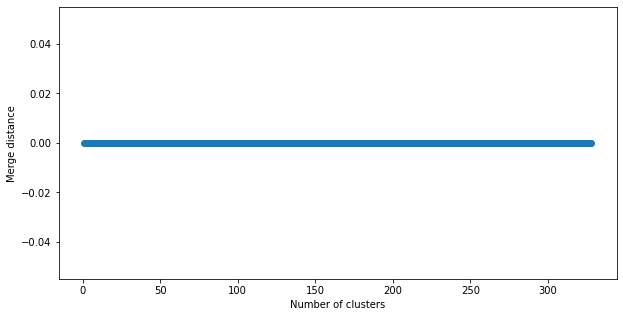

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


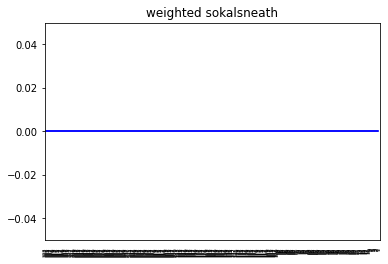

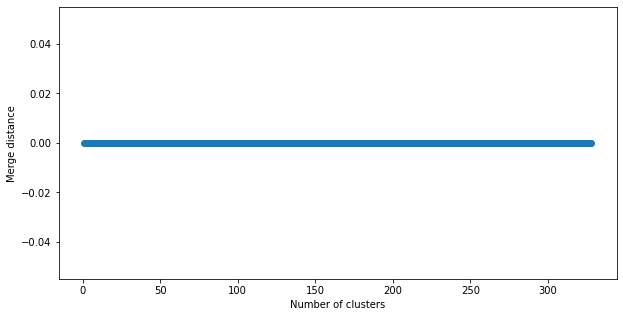

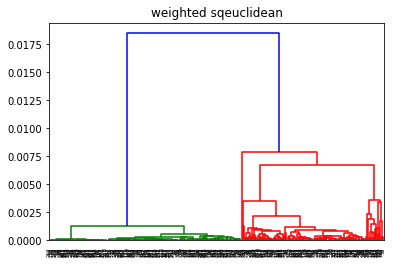

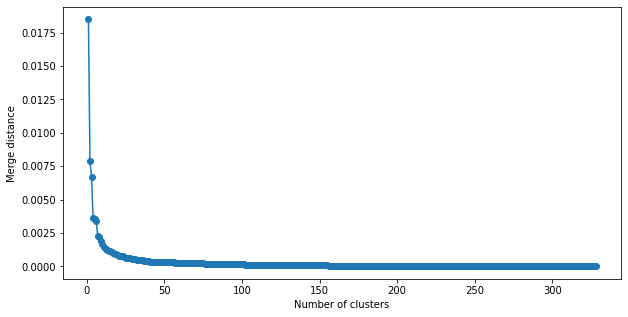

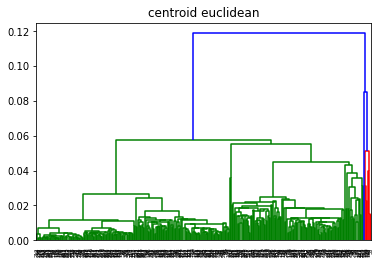

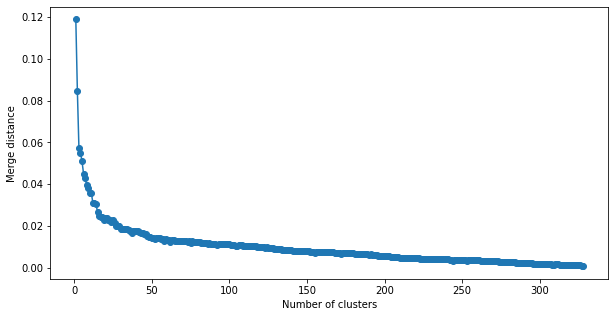

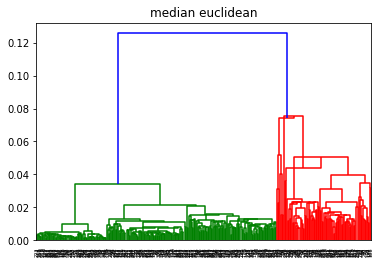

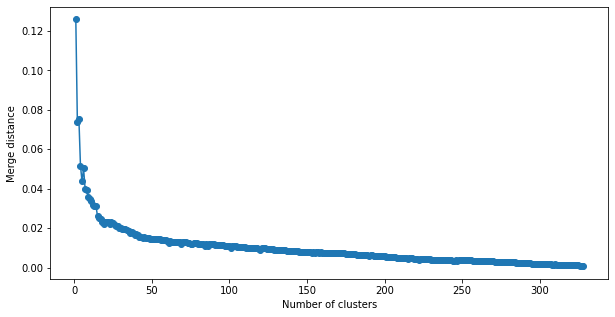

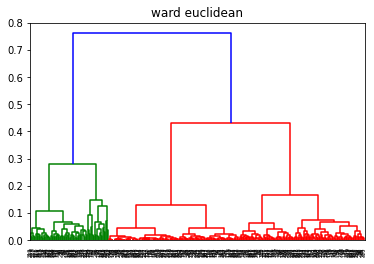

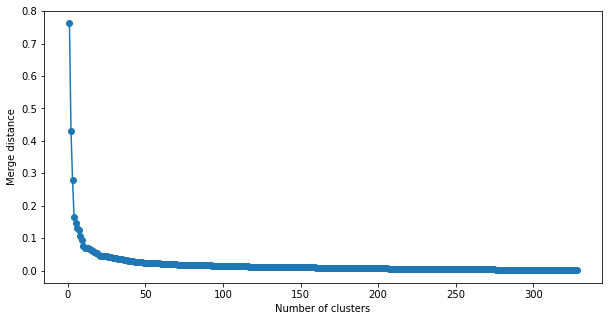

'\n\nВывод: наиболее оптимальная комбинация complete minkowski с перегибов в локтевом \nграфике в 0.4 \nВизуально на графике много ответвлений и они довольно плоские, из чего \nя сделала вывод что на основании определенных признаков делалась резкая кластеризация\n'

In [0]:
# TASK 1
'''
не включать, очень долгая функция
'''
def ierarxy(method, metric):
  Z = linkage(data_nec, method=method, metric=metric)
  plt.title(method + " " + metric)
  dendrogram(Z)
  plt.show()
  return Z

def plot_elbow(Z, h=10, w=5):
    plt.figure(figsize=(h, w))
    plt.plot(np.array(range(1, np.shape(Z)[0]+1)), 
             Z[:,2][::-1], 
             marker='o')
    plt.xlabel("Number of clusters")
    plt.ylabel("Merge distance")
    plt.show()
methods = ['complete', 'average', 'weighted']
metrics = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 
           'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon', 
           'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 
           'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 
           'sqeuclidean']

for i in methods:
  for j in metrics:
   plot_elbow(ierarxy(i, j))

methods = [ 'centroid', 'median', 'ward']
for i in methods:
    plot_elbow(ierarxy(i, 'euclidean'))
'''
данный код перебираетвсе возможные комбинации методов и метрик и строит по ним график отображающий
разбиение и локтевой график отобращающий зависимость количества кластеров от растояний до ближайших 
соседей

изучив данные я пришла к выводу что количество кластеров должно быть в диапозоне от 4 до 6
то есть дешевые дома в трущебах, дома в спальнх районах (так же плохие, средние и хорошие), 
дома в дорогих районах (так же плохие, средние и хорошие)
выбирая метрики я смотрела на локтевые графики, чтобы до перегиба было не слишком много точек (хотя 
бы меньше 10)

некоторые коммбинации давали прямую линию вместо локтя, их я очевидно рассматривать не буду

такой результат мне давала только метрика cosine, которая рассмотривает данные как вектора
но мне важно чтобы дом с параметрами 0,0,0,... не был в одной категории с домом 1,1,1,...

тогда я понизила свои требования и решила брать параметр разбиения до самого локтя, но
локтевой график должен более крутой, чтобы разбиение присходило в начале, а не в самом конце 
при маленьки расстояниях

остановимся на методе complete так как он визуально раскидывает классы более адекватно чем остальные
и рассмотрим формулы метрик, помня, что дома нельзя рассматривать как вектора

метрика jensenshannon основана на вероятностных распределениях, выглядит не так симпатично как не которые 
другие, но зато не основана на векторах)
'''

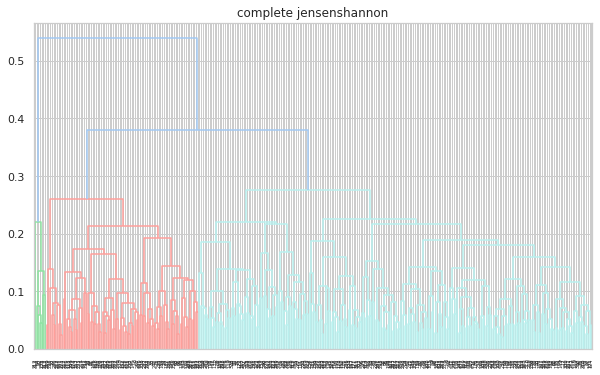

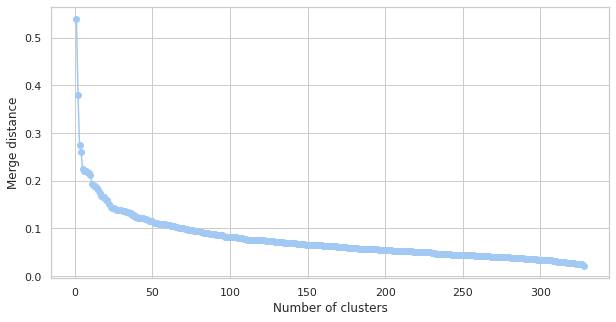

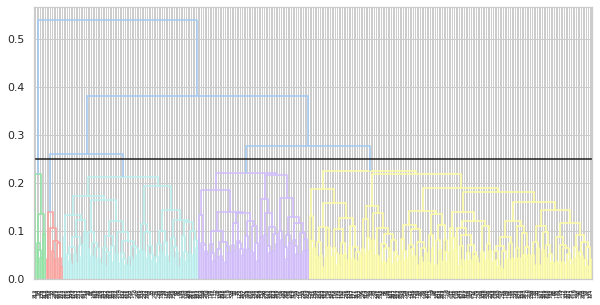

In [31]:
'''
выведем понравившеюся нам метрику еще раз и рассмотрим параметр перешиба равный
0.25 вычисленный по локтевому графику
у нас получается 5 классов, которые разные по размерам, уже сейчас примерно прикидываю,
что это города миллионики, поселки городского типа, трущебы, средние города и большие
при таком раскладе 5 классов выглядит довольно приемлемо
'''
def ierarxy(method, metric):
  Z = linkage(data_nec, method=method, metric=metric)
  plt.title(method + " " + metric)
  dendrogram(Z)
  plt.show()
  return Z

def plot_elbow(Z, h=10, w=5):
    plt.figure(figsize=(h, w))
    plt.plot(np.array(range(1, np.shape(Z)[0]+1)), 
             Z[:,2][::-1], 
             marker='o')
    plt.xlabel("Number of clusters")
    plt.ylabel("Merge distance")
    plt.show()
Z = ierarxy('complete', 'jensenshannon')
plot_elbow(Z)
plt.figure(figsize=(10, 5))
dendrogram(Z, color_threshold=0.25)
plt.axhline(y=0.25, c='k')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


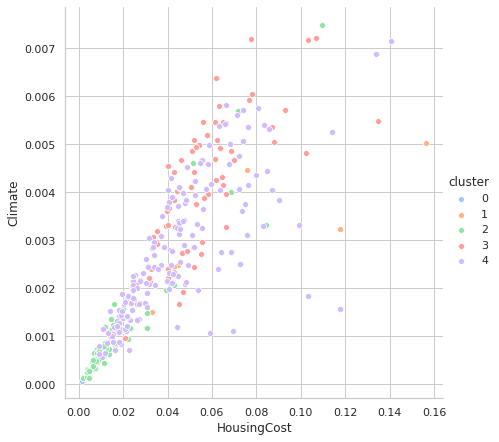

In [32]:
def cor(data, cluster, x, y):
  sns.pairplot(x_vars=x, 
             y_vars=y, 
             hue=cluster,
             data=data, 
             size=6)
  plt.gca().set(xlabel=x, ylabel=y)
  plt.show()
data_f = data_nec.copy()
data_f['cluster'] = fcluster(Z, t=5, criterion='maxclust')
data_f['cluster'] = [x-1 for x in data_f['cluster'].to_numpy()]
cor(data_f, 'cluster', 'HousingCost', 'Climate')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


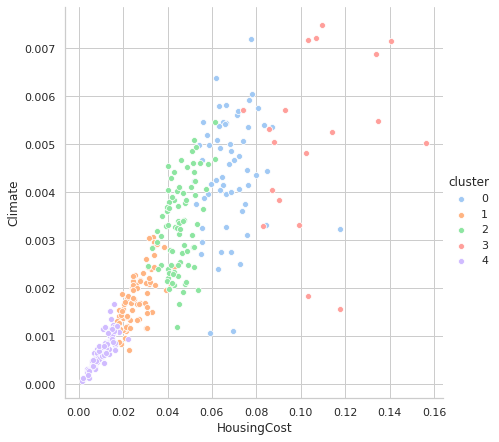

In [33]:
#TASK 3
K = KMeans(n_clusters = 5, # число кластеров
           init = 'random',
           n_init = 1,
           max_iter = 100, 
           random_state=15434,
          )
K.fit(data_nec)
data_kmeans = data_nec.copy() # shallow copy

data_kmeans['cluster'] = K.labels_.astype(int)
cor(data_kmeans, 'cluster', 'HousingCost', 'Climate')



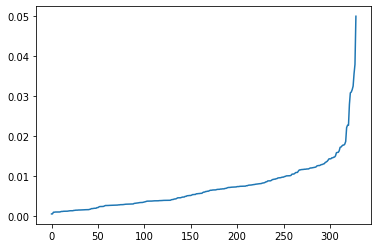

In [0]:
# TASK 2
'''
выполним эвристику

для начала, построим локтевой график отображающий зависимость количества точек 
и средних дистанций от одной до к ближайших соседей

эпсилон будет чуть ниже перегиба
а второй параметр сделаем натуральный логорифм от количества точек 
'''
k = 5
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(data_nec)
distances, indices = nbrs.kneighbors(data_nec)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


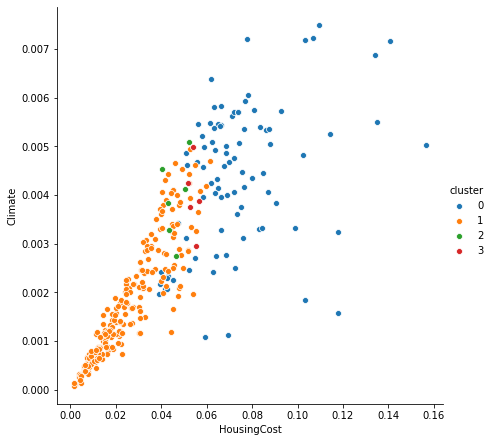

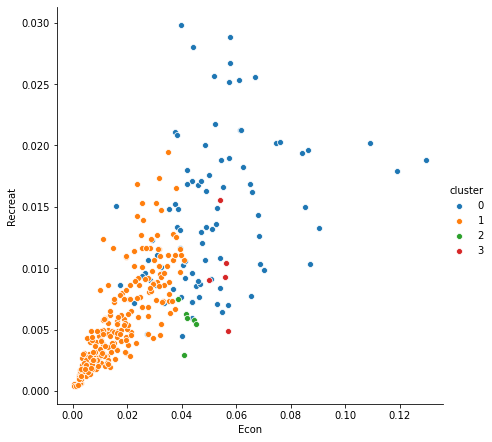

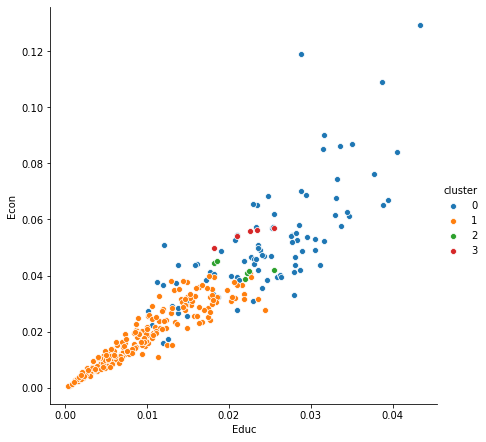

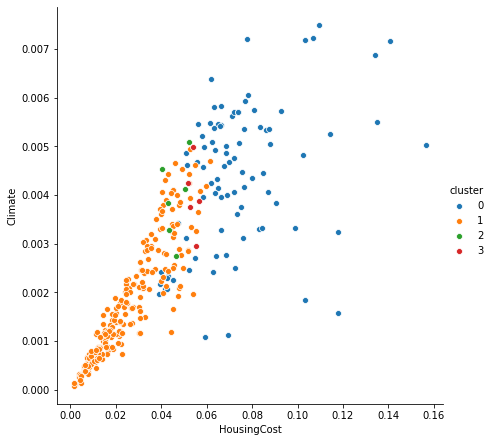

In [0]:

dbscan = DBSCAN(eps=0.01, min_samples=k, metric='euclidean')
dbscan.fit_predict(data_nec)
data_db = data_nec.copy() 

data_db['cluster'] = dbscan.labels_.astype(int)
data_db['cluster'] = [x+1 for x in data_db['cluster'].to_numpy()]

cor(data_db, 'cluster' , 'HousingCost', 'Climate')
cor(data_db, 'cluster' , 'Econ', 'Recreat')
cor(data_db, 'cluster' ,'Educ', 'Econ')
cor(data_db, 'cluster' ,'HousingCost', 'Climate')



/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


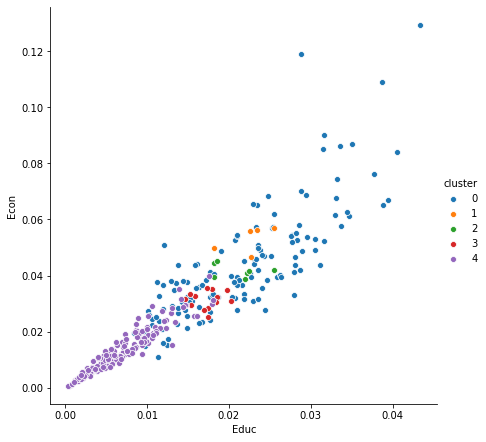

In [0]:
#TASK 5
#!pip install hdbscan
import hdbscan
data_hdbscan = data_nec.copy() 
cl_hdbscan = hdbscan.HDBSCAN(min_cluster_size=3, gen_min_span_tree=True)
cl_hdbscan.fit(data_hdbscan)
data_hdbscan['cluster'] = cl_hdbscan.labels_
data_hdbscan['cluster'] = [x+1 for x in data_hdbscan['cluster'].to_numpy()]
cor(data_hdbscan, 'cluster', 'Educ', 'Econ')


In [0]:
#TASK 6 
'''
посчитаем и выведем средне квадратичное отклонение у кластеров
'''
def count_std(data, k):
  std = 0
  for i in range(k):
    std += data.loc[data['cluster'] == i].std()[0]
  return std/k
algos = [data_f, data_kmeans, data_db, 
          data_pam, data_hdbscan]
names = ['fcluster', 'k_means', 'db_scan', 'my_pam', 'hdb_scan']
results = []
for i in range(len(algos)):
  if i == 2:
    results.append(count_std(algos[i], 4))
  else:
    results.append(count_std(algos[i], 5))
pd.Series(results, index=names)

fcluster    0.001148
k_means     0.000960
db_scan     0.001071
my_pam      0.000953
hdb_scan    0.000959
dtype: float64

In [0]:
'''
посчитаем метрику силует
'''
results = []
for i in algos:
  results.append(metrics.silhouette_score(data_nec, i['cluster'], metric='euclidean'))
pd.Series(results, index=names)

fcluster   -0.143211
k_means     0.370106
db_scan     0.109915
my_pam      0.367309
hdb_scan    0.114261
dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


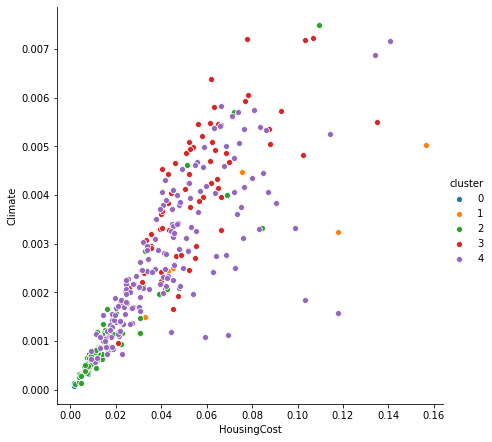

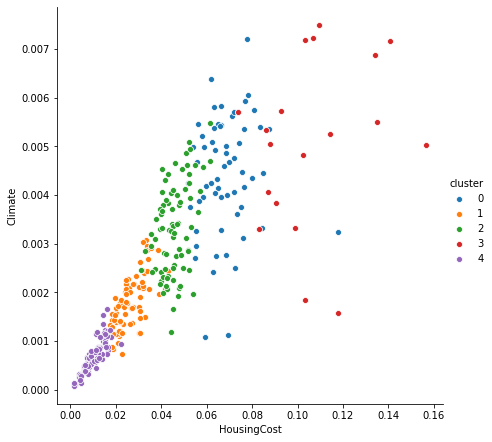

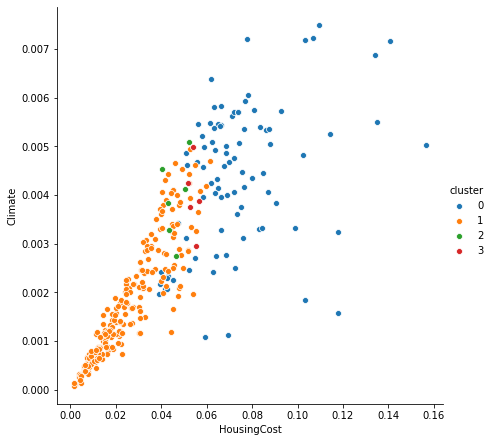

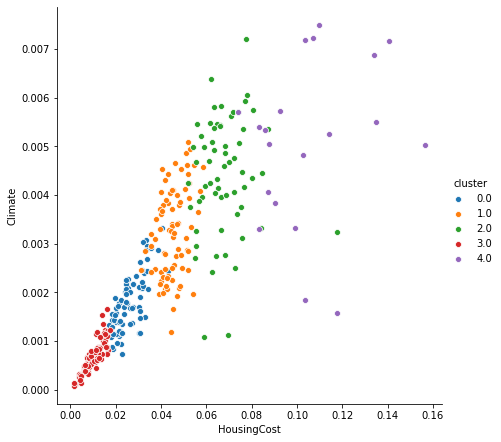

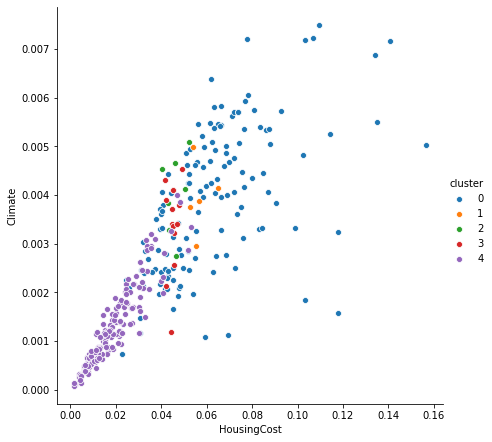

'\nитак, еще раз визуализируем все мои труды\nв предыдущей ячейке я приминила алгоритм оценки кластеризации silhouette, так\nкак он не нуждается в уже готовых кластерах для сравнения\n\nполучается, что алгоритм иерархической кластеризации fcluster(1) получился \nплохой (разрозненной) кластеризацией, так как его оценка меньше нуля и если \nпосотреть на картинку честкого распределения по областям мы не видим\n\nближе к нулю оценка у дб скана(3) и его производной(5), это говрит о том, что\n кластеры пересекаются и накладываются друг на друга. Действитель, несмотря на то\n что уже угадываются силуэты мы по прежнему не можем сказать что если точка \n находится на определенном месте графика, какому классу она принадлежит\n\nвыше оценка (с натяжкой можно сказать близка к единице) у кминса(2) и пама(4), что\nсоответствует "плотным" четко выделенным кластерам.\nи действительно в данных алгоритмах довольно четко выделены области принадлежности классам\n\nметрика силуэта считает растояния от точк

In [0]:
cor(data_f, 'cluster', 'HousingCost', 'Climate')
cor(data_kmeans, 'cluster' , 'HousingCost', 'Climate')
cor(data_db, 'cluster' , 'HousingCost', 'Climate')
cor(data_pam, 'cluster' ,  'HousingCost', 'Climate')
cor(data_hdbscan, 'cluster' , 'HousingCost', 'Climate')
'''
итак, еще раз визуализируем все мои труды
в предыдущей ячейке я применила алгоритм оценки кластеризации silhouette, так
как он не нуждается в уже готовых кластерах для сравнения

получается, что алгоритм иерархической кластеризации fcluster(1) получился 
плохой (разрозненной) кластеризацией, так как его оценка меньше нуля и если 
посотреть на картинку честкого распределения по областям мы не видим

ближе к нулю оценка у дб скана(3) и его производной(5), это говрит о том, что
 кластеры пересекаются и накладываются друг на друга. Действитель, несмотря на то
 что уже угадываются силуэты мы по прежнему не можем сказать что если точка 
 находится на определенном месте графика, какому классу она принадлежит

выше оценка (с натяжкой можно сказать близка к единице) у кминса(2) и пама(4), что
соответствует "плотным" четко выделенным кластерам.
и действительно в данных алгоритмах довольно четко выделены области принадлежности классам

метрика силуэта считает растояния от точки до точек из класса, которому она принадлежит
и до точек ближайшего к ней класса (другого)
так как и при поиске медоидов(пам), и при поиске центроидов(к минс) мы эти растояния 
минимизируем, логично утверждать что оценка будет высокой

так же у данных метрик самый низкий показатель среднеквадратичного отклонения
внутри кластеров

'''

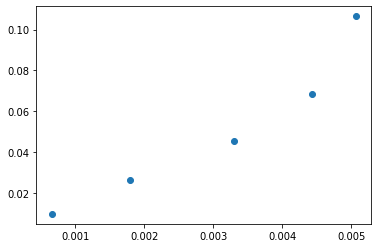

'\nв целом напоминает лесенку, которую можно интерпретировать как "уровень благоприятности"\nтак как мы изначально рассмотривали города как множество показателей качества от \n0 до 1 (после нормирования), то и кластеризация должна была вывести объекты \nпо их ранжируемости относительно меток. \nочевидно что алгоритм не показывает нам где находятся самые элитные города, а\nгде трущобы, но это можно сказать расположив центры классов на одной плоскости\n\nсамая высоккая точка - город с наивысщими показателями аля Москва\nниже - Нижний Новгород\nсередина - Кстово\nпониже - Богородск\nНу а дальше - Сормово))))))))\n'

In [0]:
# TASK 7
'''
наилучшую оценку получает методека к ближайших соседей, мой алгоритм слегка 
отстает в оценке, но он работает намного медленней, так что я остановлюсь на этом
Выведем центры наших разбиений
'''
centers_climate = [x[0] for x in K.cluster_centers_]
centers_cost = [x[1] for x in K.cluster_centers_]
plt.scatter(centers_climate, centers_cost)
plt.show()
'''
в целом напоминает лесенку, которую можно интерпретировать как "уровень благоприятности"
так как мы изначально рассмотривали города как множество показателей качества от 
0 до 1 (после нормирования), то и кластеризация должна была вывести объекты 
по их ранжируемости относительно меток. 
очевидно что алгоритм не показывает нам где находятся самые элитные города, а
где трущобы, но это можно сказать расположив центры классов на одной плоскости

самая высоккая точка - город с наивысш  ими показателями аля Москва
ниже - Нижний Новгород
середина - Кстово
пониже - Автозавод
Ну а дальше - Сормово))))))))
'''

In [57]:
'''
Выводы:
точки из определенного кластерарасположены на 
береговой линии. скорее всег отам развит туризм и хорошая экономика
так же есть точки которые расположены на месте крупных городов в центре 
самых больших скоплений
ноунеймовские города так же выделены другим цветом
'''
import folium
colors=['black', 'purple', 'lightgreen', 'blue', 'red']
Long = data['Long'].values.tolist()
Lat = data['Lat'].values.tolist()
cluster = data_kmeans['cluster'].values.tolist()
m = folium.Map(location=[Lat[0], Long[0]])

for i in range(1, len(Long)):
 
  folium.Circle(
      radius=100,
    location=[Lat[i], Long[i]],
  color=colors[cluster[i]]
).add_to(m)
m